# 1- COUNTRY INVASION GAME

## ORIGINAL MAP

#### This code creates a 10×10 grid map, colors each territory by country, calculates each country’s center, displays the country name at its center, and shows a nice, labeled “world map” made of small squares.

Initial Map


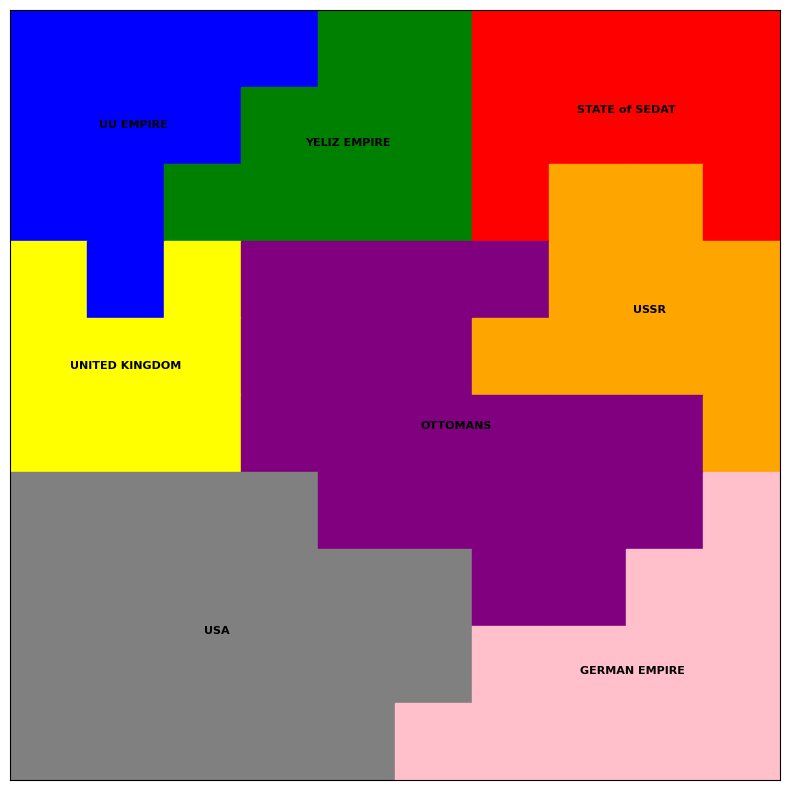

In [57]:
import matplotlib.pyplot as plt
import numpy as np

map_size = 10
map_data = np.array([
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 2],
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 2],
    [0, 0, 1, 1, 1, 1, 2, 7, 7, 2],
    [3, 0, 3, 4, 4, 4, 4, 7, 7, 7],
    [3, 3, 3, 4, 4, 4, 7, 7, 7, 7],
    [3, 3, 3, 4, 4, 4, 4, 4, 4, 7],
    [5, 5, 5, 5, 4, 4, 4, 4, 4, 6],
    [5, 5, 5, 5, 5, 5, 4, 4, 6, 6],
    [5, 5, 5, 5, 5, 5, 6, 6, 6, 6],
    [5, 5, 5, 5, 5, 6, 6, 6, 6, 6],
])

# Country colors
colors = {
    0: "blue",   # Country 0
    1: "green",  # Country 1
    2: "red",    # Country 2
    3: "yellow", # Country 3
    4: "purple", # Country 4
    5: "grey",
    6: "pink",
    7: "orange"
}
def draw_map(map_data):
    plt.figure(figsize=(10, 10))
    country_positions = {}  # To store calculated center positions for country names

    # Draw the map and collect all positions for each country
    for i in range(map_size):
        for j in range(map_size):
            # Draw the colored cell
            plt.gca().add_patch(plt.Rectangle((j, map_size - i - 1), 1, 1, color=colors[map_data[i, j]]))

            # Collect all positions for each country
            country_id = map_data[i, j]
            if country_id not in country_positions:
                country_positions[country_id] = []
            country_positions[country_id].append((j + 0.5, map_size - i - 1 + 0.5))

    # Calculate the center position for each country
    for country_id, positions in country_positions.items():
        avg_x = sum(x for x, y in positions) / len(positions)
        avg_y = sum(y for x, y in positions) / len(positions)
        country_positions[country_id] = (avg_x, avg_y)  # Update with the center

    # Add country names based on their representative positions
    country_names = {
        0: "UU EMPIRE",
        1: "YELIZ EMPIRE",
        2: "STATE of SEDAT",
        3: "UNITED KINGDOM",
        4: "OTTOMANS",
        5: "USA",
        6: "GERMAN EMPIRE",
        7: "USSR"
    }

    for country, position in country_positions.items():
        plt.text(position[0], position[1], country_names[country], 
                 ha="center", va="center", fontsize=8, color="black", weight="bold")

    plt.xlim(0, map_size)
    plt.ylim(0, map_size)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_aspect('equal')
    plt.show()
 

print("Initial Map")
draw_map(map_data)

## * WAR OF TWO COUNTRY

#### in invade function last line, u manually write 2 coutnry name , they attack and one of them randomly take some land and shows both start map and final map.

Initial Map


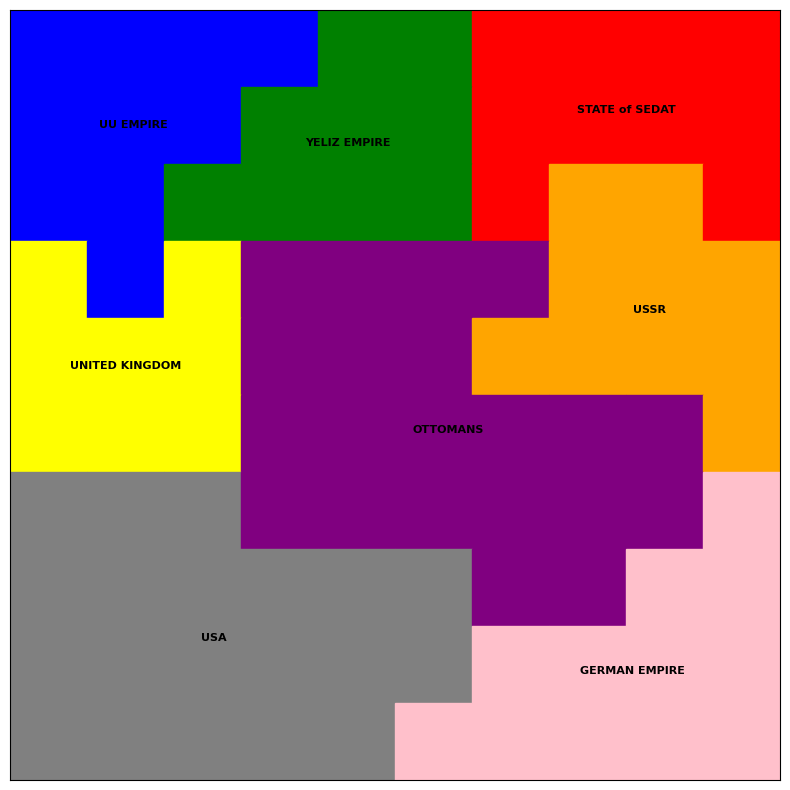

After Country 4 invades Country 5


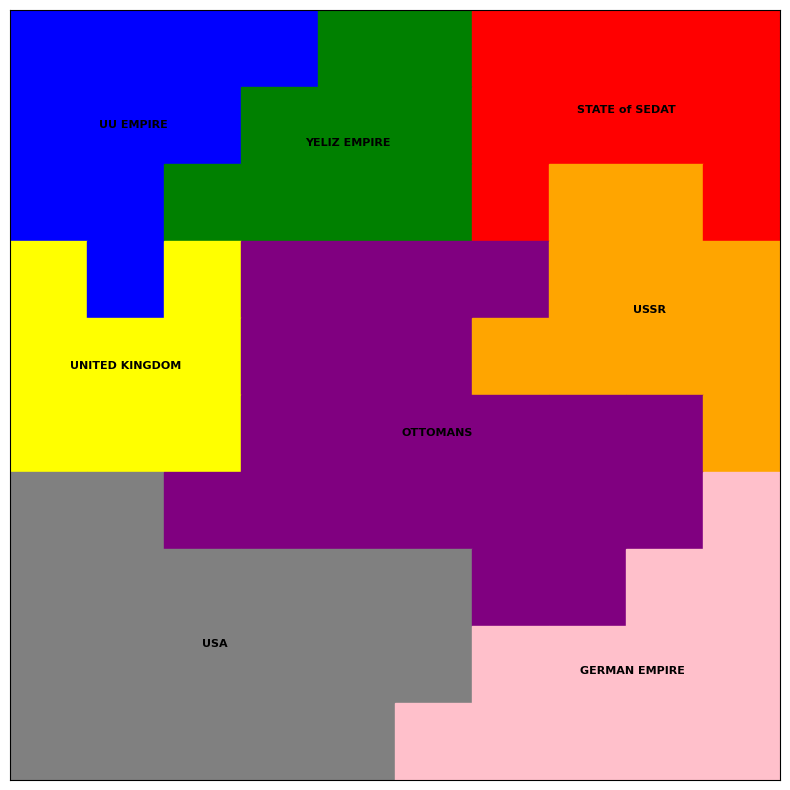

In [4]:
def invade(map_data, attacker, defender):
    for i in range(map_size):
        for j in range(map_size):
            # Check if the cell belongs to the defender
            if map_data[i, j] == defender:
                # Check if any neighbor belongs to the attacker
                neighbors = [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        if map_data[ni, nj] == attacker:
                            map_data[i, j] = attacker  # Conquer this cell
                            return  # Stop after one cell is conquered



# Initial map
print("Initial Map")
draw_map(map_data)

# Perform invasion
print("After Country 4 invades Country 5")
invade(map_data, attacker=4, defender=5)  # Modify map_data directly
draw_map(map_data)



##### NONE : only shows new updated map

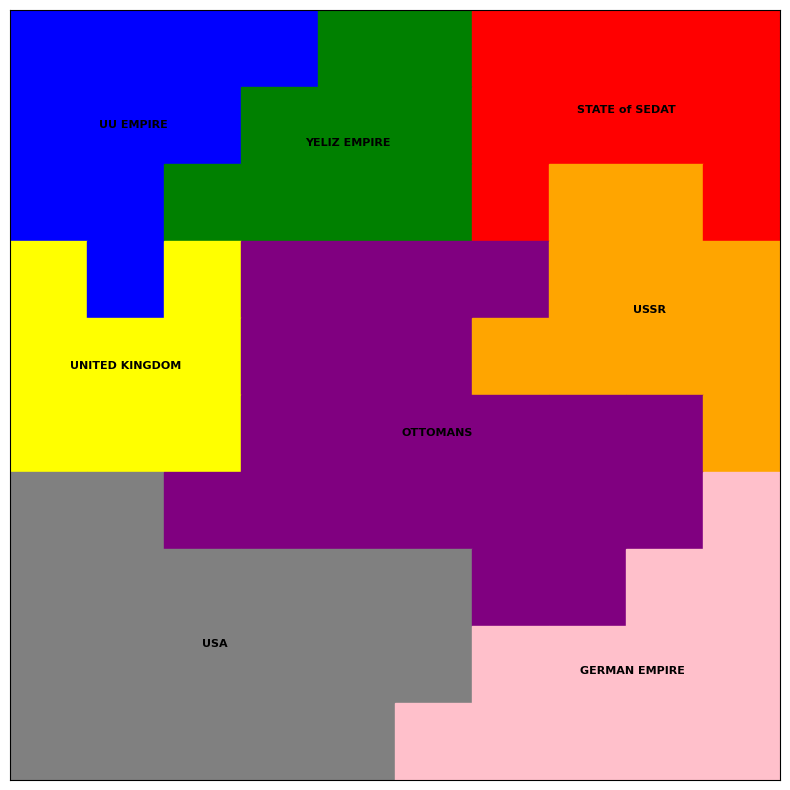

In [5]:
draw_map(map_data)

## QUICK WAR

##### NONE: Nothing different invade function

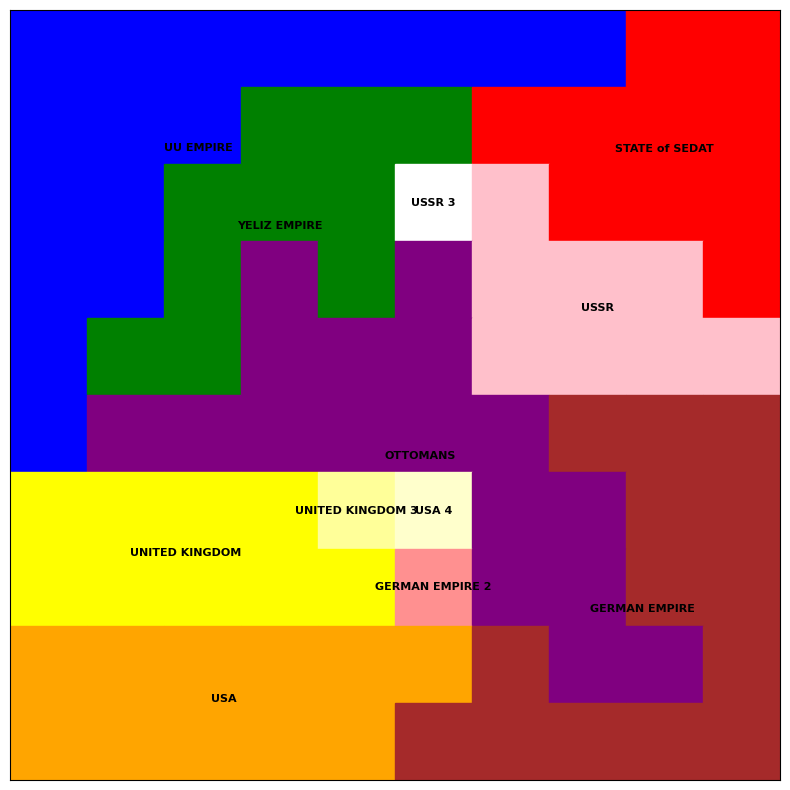

In [41]:
invade(map_data, attacker=0, defender=2)  # Modify map_data directly
draw_map(map_data)

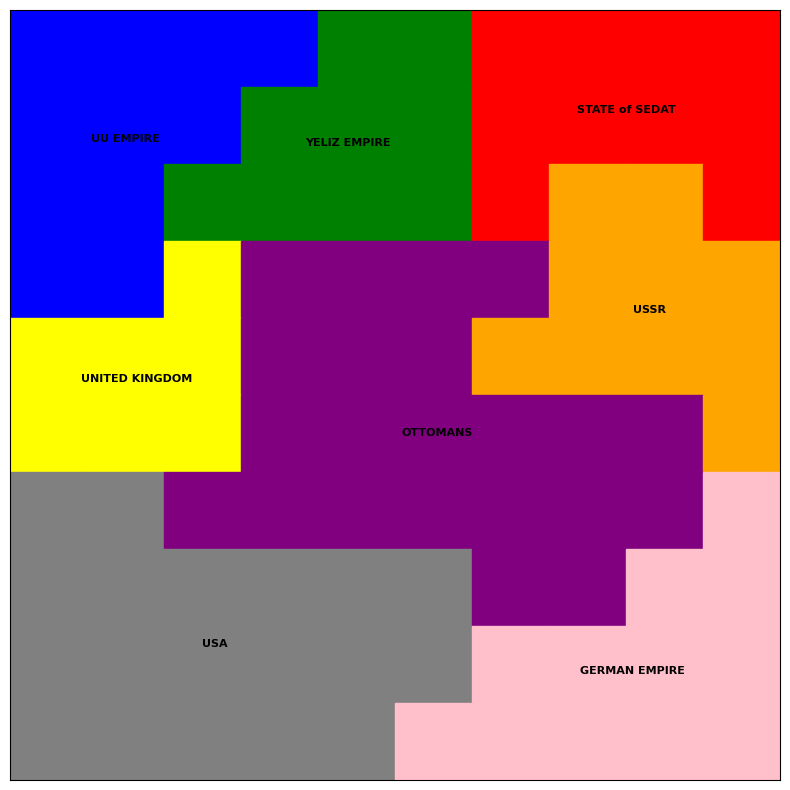

In [7]:
draw_map(map_data)

##### NONE: Only shows country numbers

In [8]:
import numpy as np

# Print unique country IDs
unique_countries = np.unique(map_data)
print("\nUnique Country IDs in Final Map:")
print(unique_countries)



Unique Country IDs in Final Map:
[0 1 2 3 4 5 6 7]


## ** RUN WITH COUNTRY NUMBERS

##### Showing country number and color and regions


Final Map Data (Country Numbers):
[[0 0 0 0 1 1 2 2 2 2]
 [0 0 0 1 1 1 2 2 2 2]
 [0 0 1 1 1 1 2 7 7 2]
 [0 0 3 4 4 4 4 7 7 7]
 [3 3 3 4 4 4 7 7 7 7]
 [3 3 3 4 4 4 4 4 4 7]
 [5 5 4 4 4 4 4 4 4 6]
 [5 5 5 5 5 5 4 4 6 6]
 [5 5 5 5 5 5 6 6 6 6]
 [5 5 5 5 5 6 6 6 6 6]]

Unique Country IDs in Final Map:
[0 1 2 3 4 5 6 7]


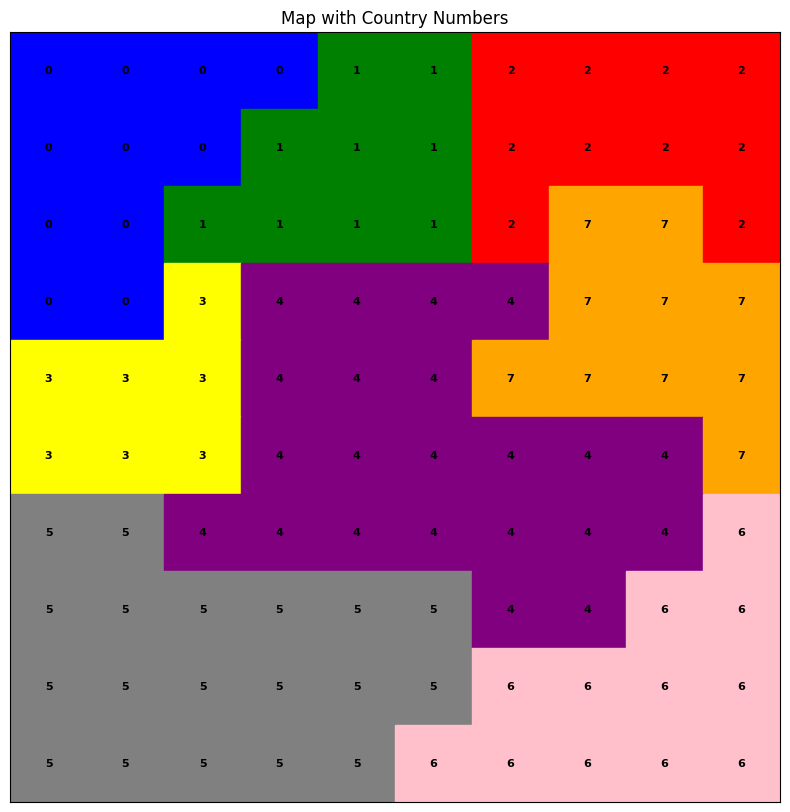

In [11]:
def draw_map_with_numbers(map_data):
    plt.figure(figsize=(10, 10))

    for i in range(map_size):
        for j in range(map_size):
            # Draw the colored cell
            plt.gca().add_patch(
                plt.Rectangle((j, map_size - i - 1), 1, 1, color=colors[map_data[i, j]])
            )

            # Overlay the country number
            plt.text(j + 0.5, map_size - i - 1 + 0.5, str(map_data[i, j]),
                     ha="center", va="center", fontsize=8, color="black", weight="bold")

    # Configure plot display
    plt.xlim(0, map_size)
    plt.ylim(0, map_size)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_aspect('equal')
    plt.title("Map with Country Numbers")
    plt.show()


# Print the final map data
print("\nFinal Map Data (Country Numbers):")
print(map_data)

# Print unique country IDs
unique_countries = np.unique(map_data)
print("\nUnique Country IDs in Final Map:")
print(unique_countries)

# Display the final map with country numbers
draw_map_with_numbers(map_data)


# 2- AUTOMATIC ATTACKS with SPLIT

##### This code simulates one random “turn” of invasions between countries on your 10×10 map.Each country occupies certain cells, and in each turn, some of them randomly attack neighboring countries to capture one of their cells.

Country 4 attacks Country 3
Country 1 attacks Country 2
Country 6 attacks Country 4
Country 3 attacks Country 5
Country 5 attacks Country 4
Country 2 attacks Country 4
Country 7 attacks Country 2


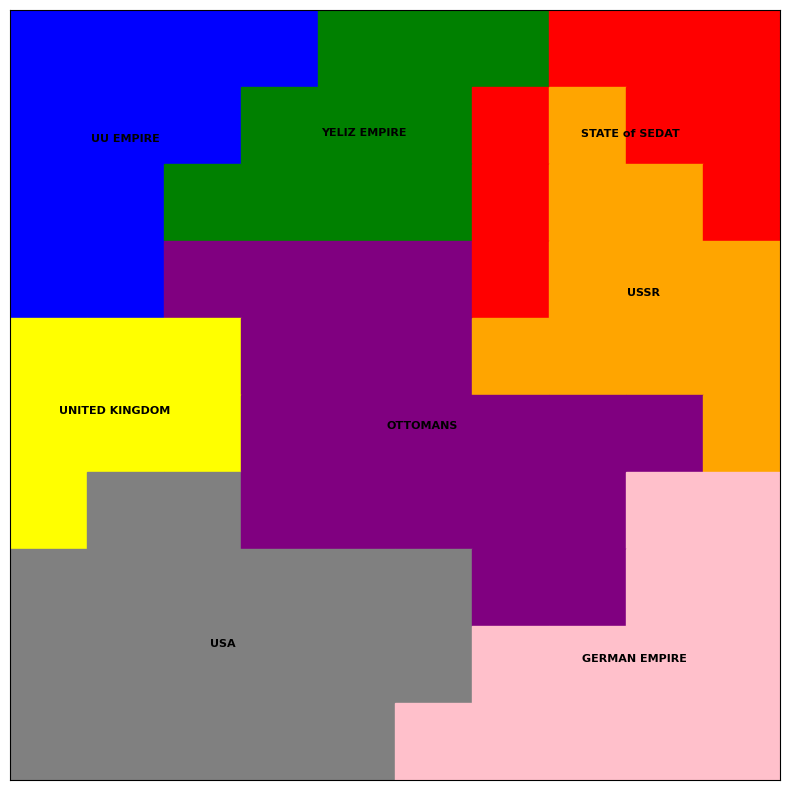

In [12]:
import numpy as np
import random

# Simulate an invasion
def invade(map_data, attacker, defender):
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == defender:
                # Check if the defender cell has a neighboring attacker cell
                neighbors = [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        if map_data[ni, nj] == attacker:
                            map_data[i, j] = attacker  # Conquer this cell
                            return True  # Successful invasion
    return False  # No invasion occurred

# Find neighboring countries
def find_neighbors(map_data, country_id):
    neighbors = set()
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == country_id:
                # Check all neighbors
                for ni, nj in [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        neighbor = map_data[ni, nj]
                        if neighbor != country_id:  # Exclude itself
                            neighbors.add(neighbor)
    return neighbors

# Simulate a random turn
def random_turn(map_data, stable_countries, countries):
    # Get the list of countries that can attack
    potential_attackers = [c for c in countries if c not in stable_countries]

    # Randomly shuffle the attackers
    random.shuffle(potential_attackers)

    # Randomly pair attackers and defenders
    for attacker in potential_attackers:
        # Find all neighboring countries
        neighbors = find_neighbors(map_data, attacker)
        # Exclude stable countries from being attacked
        valid_targets = [n for n in neighbors if n not in stable_countries]
        if valid_targets:
            # Randomly select a defender from valid targets
            defender = random.choice(valid_targets)
            # Perform the invasion
            print(f"Country {attacker} attacks Country {defender}")
            invade(map_data, attacker, defender)


# Define stable countries
stable_countries = {0}  # These countries are stable and cannot attack or be attacked

# All countries present in the map
countries = set(np.unique(map_data))

random_turn(map_data, stable_countries, countries)
draw_map(map_data)


## 3- NAMING SPLIT

##### This version runs a random invasion turn just like before, where non-stable attackers choose neighboring defenders and conquer one adjacent cell using invade; it then detects connected regions for each country with a flood-fill (find_connected_regions) to find separate “islands,” and after each successful invasion it automatically handles splits (handle_splits) by keeping the largest region as the original country, re-labeling smaller regions with new unique IDs (new_id = max(map_data)+1), generating new names like “OTTOMANS 1,” “OTTOMANS 2,” and assigning lighter variant colors via adjust_color; finally, draw_map displays the updated map and places each country name at the centroid of every connected region rather than a single overall center.

In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Simulate an invasion
def invade(map_data, attacker, defender):
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == defender:
                # Check if the defender cell has a neighboring attacker cell
                neighbors = [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        if map_data[ni, nj] == attacker:
                            map_data[i, j] = attacker  # Conquer this cell
                            return True  # Successful invasion
    return False  # No invasion occurred

# Find connected regions for a specific country
def find_connected_regions(map_data, country_id):
    visited = set()
    regions = []

    def flood_fill(i, j):
        stack = [(i, j)]
        region = []
        while stack:
            x, y = stack.pop()
            if (x, y) not in visited and 0 <= x < map_size and 0 <= y < map_size and map_data[x, y] == country_id:
                visited.add((x, y))
                region.append((x, y))
                # Add neighbors
                stack.extend([(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])
        return region

    for i in range(map_size):
        for j in range(map_size):
            if (i, j) not in visited and map_data[i, j] == country_id:
                region = flood_fill(i, j)
                if region:
                    regions.append(region)
    return regions

# Handle splits and assign new IDs to smaller regions
split_counters = {}  # Keep track of the number of splits for each country

def handle_splits(map_data, country_id):
    regions = find_connected_regions(map_data, country_id)
    if len(regions) > 1:  # If the country is split into multiple regions
        # Sort regions by size (largest region first)
        regions = sorted(regions, key=len, reverse=True)

        # Ensure we have a counter for the country
        if country_id not in split_counters:
            split_counters[country_id] = 0

        for region in regions[1:]:  # Keep the largest region as the original
            split_counters[country_id] += 1  # Increment the split counter
            new_id = max(map_data.flatten()) + 1  # Assign a new unique ID
            for x, y in region:
                map_data[x, y] = new_id  # Assign the new ID to the split region

            # Add new country name and color
            country_names[new_id] = f"{country_names[country_id]} {split_counters[country_id]}"
            country_colors[new_id] = adjust_color(country_colors[country_id], split_counters[country_id])

# Adjust the color tone (lighter or darker)
def adjust_color(color, factor):
    rgb = mcolors.to_rgb(color)
    adjustment = 0.2 * factor
    return tuple(min(max(c + adjustment, 0), 1) for c in rgb)

# Simulate a random turn
def random_turn(map_data, stable_countries, countries):
    # Get the list of countries that can attack
    potential_attackers = [c for c in countries if c not in stable_countries]

    # Randomly shuffle the attackers
    random.shuffle(potential_attackers)

    # Randomly pair attackers and defenders
    for attacker in potential_attackers:
        # Find all neighboring countries
        neighbors = find_neighbors(map_data, attacker)
        # Exclude stable countries from being attacked
        valid_targets = [n for n in neighbors if n not in stable_countries]
        if valid_targets:
            # Randomly select a defender from valid targets
            defender = random.choice(valid_targets)
            # Perform the invasion
            print(f"Country {attacker} attacks Country {defender}")
            if invade(map_data, attacker, defender):
                handle_splits(map_data, defender)  # Handle splits after the invasion

# Draw the map
def draw_map(map_data):
    plt.figure(figsize=(10, 10))
    for i in range(map_size):
        for j in range(map_size):
            # Draw the colored cell
            plt.gca().add_patch(plt.Rectangle((j, map_size - i - 1), 1, 1, color=country_colors[map_data[i, j]]))

    # Display country names in the middle of their territories
    for country_id in country_names:
        regions = find_connected_regions(map_data, country_id)
        for region in regions:
            avg_x = sum(x for x, y in region) / len(region)
            avg_y = sum(y for x, y in region) / len(region)
            plt.text(avg_y + 0.5, map_size - avg_x - 0.5, country_names[country_id], 
                     ha="center", va="center", fontsize=8, color="black", weight="bold")

    # Configure plot display
    plt.xlim(0, map_size)
    plt.ylim(0, map_size)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_aspect('equal')
    plt.show()


# Country names and colors
country_names = {
    0: "UU EMPIRE",
    1: "YELIZ EMPIRE",
    2: "STATE of SEDAT",
    3: "UNITED KINGDOM",
    4: "OTTOMANS",
    5: "USA",
    6: "GERMAN EMPIRE",
    7: "USSR"
}

country_colors = {
    0: "blue",
    1: "green",
    2: "red",
    3: "yellow",
    4: "purple",
    5: "orange",
    6: "brown",
    7: "pink",
}

# All countries present in the map
countries = set(np.unique(map_data))

# Define stable countries
stable_countries = {0}  # These countries are stable and cannot attack or be attacked

random_turn(map_data, stable_countries, countries)
draw_map(map_data)
# Run multiple turns
#for turn in range(10):
 #   print(f"\nTurn {turn + 1}")
 #   random_turn(map_data, stable_countries, countries)
 #   draw_map(map_data)


Country 31 attacks Country 26
Country 29 attacks Country 30
Country 27 attacks Country 5
Country 1 attacks Country 25
Country 7 attacks Country 4
Country 26 attacks Country 31
Country 4 attacks Country 7
Country 20 attacks Country 3
Country 5 attacks Country 3
Country 25 attacks Country 1
Country 30 attacks Country 6
Country 6 attacks Country 27


KeyError: np.int64(27)

KeyError: np.int64(31)

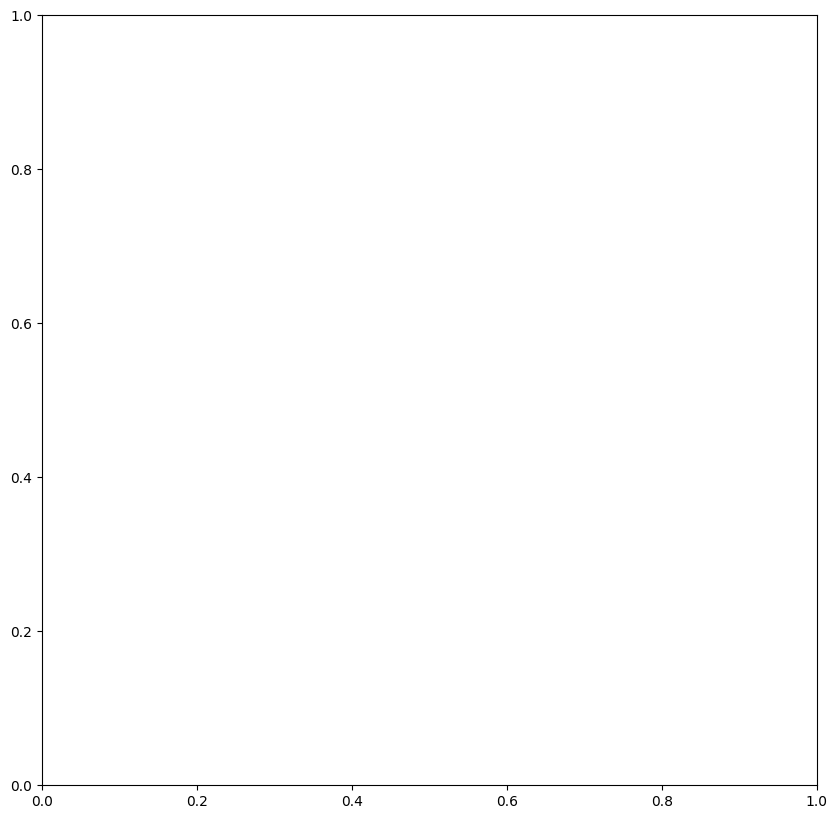

In [49]:
draw_map(map_data)

In [50]:

random_turn(map_data, stable_countries, countries)
draw_map(map_data)

Country 7 attacks Country 29


KeyError: np.int64(29)

KeyError: np.int64(31)

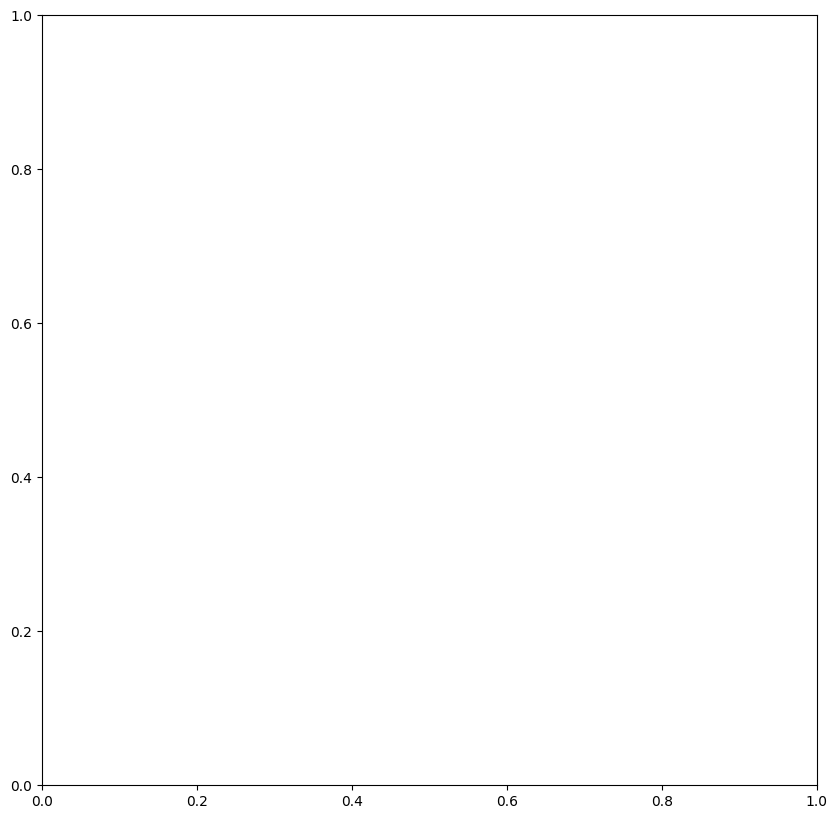

In [51]:
draw_map(map_data)

## 4- QUICK WAR

KeyError: np.int64(31)

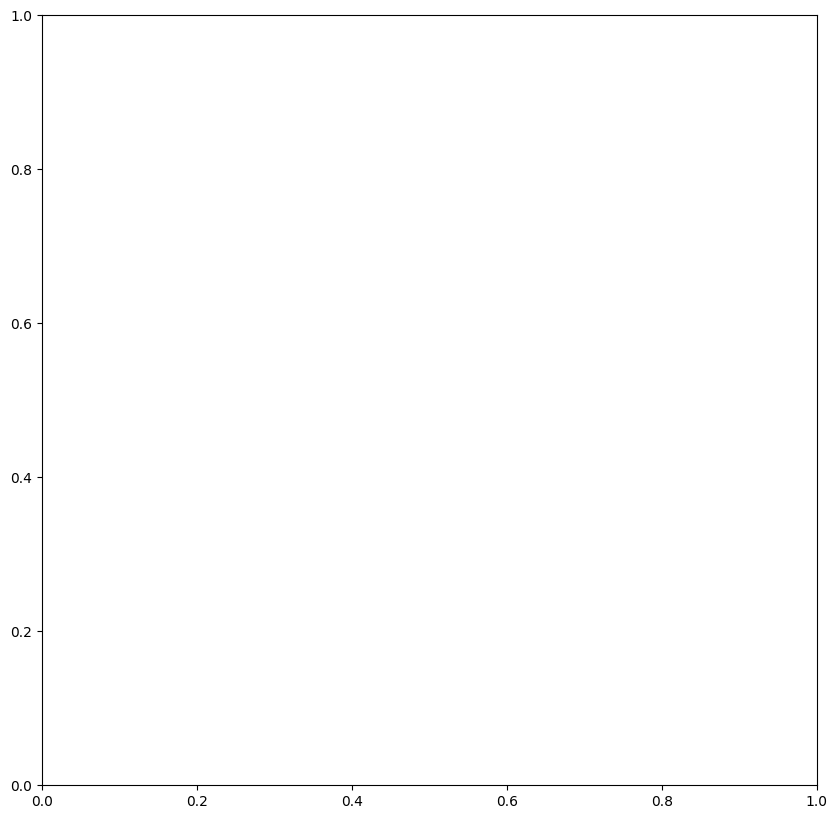

In [52]:
invade(map_data, attacker=0, defender=3)  # Modify map_data directly
draw_map(map_data)

KeyError: np.int64(31)

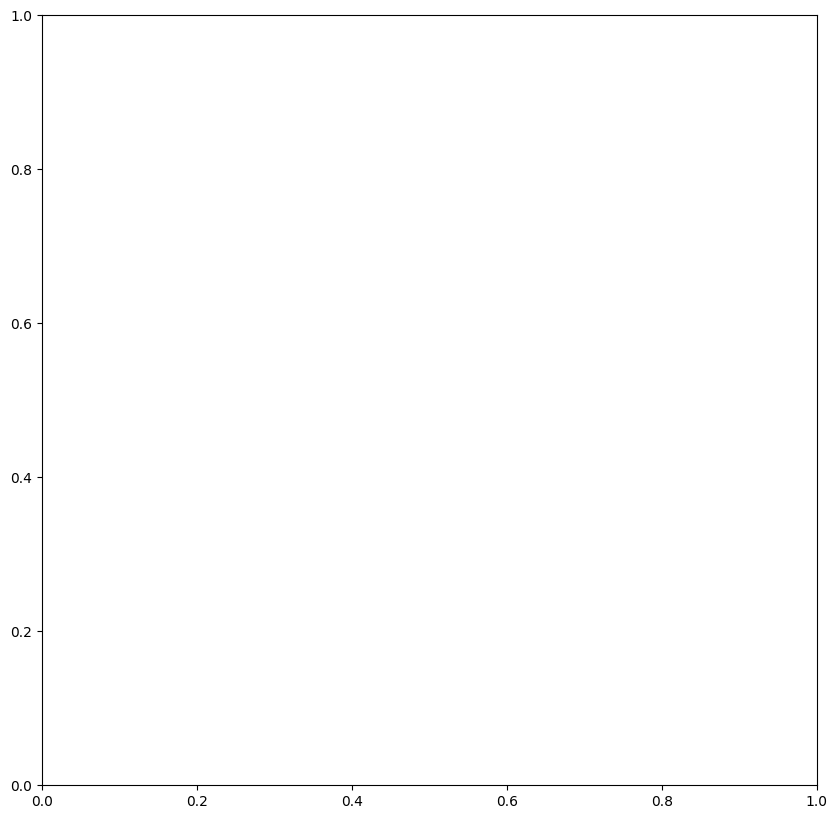

In [53]:
invade(map_data, attacker=0, defender=3)  # Modify map_data directly
draw_map(map_data)

random_turn(map_data, stable_countries, countries)
draw_map(map_data)

## AUTOMATIC

In [54]:
# Run multiple turns silently
for turn in range(10000):
    print(f"\nTurn {turn + 1}")
    random_turn(map_data, stable_countries, countries)

# Display the final map after 1000 turns
print("\nFinal Map:")
draw_map(map_data)



Turn 1
Country 29 attacks Country 7
Country 5 attacks Country 6
Country 27 attacks Country 5
Country 26 attacks Country 1
Country 31 attacks Country 26


KeyError: np.int64(26)

In [36]:

# Run multiple turns
for turn in range(100):
    print(f"\nTurn {turn + 1}")
    random_turn(map_data, stable_countries, countries)
    draw_map(map_data)



Turn 1
Country 2 attacks Country 17
Country 13 attacks Country 7
Country 7 attacks Country 4
Country 1 attacks Country 4
Country 10 attacks Country 5
Country 6 attacks Country 13


KeyError: 13

## AUTOMATIC NO SPLIT


Turn 1
Country 5 attacks Country 6
Country 24 attacks Country 32
Country 1 attacks Country 31
Country 0 attacks Country 4
Country 4 attacks Country 31
Country 34 attacks Country 30
Country 35 attacks Country 24
Country 38 attacks Country 37
Country 2 attacks Country 0
Country 26 attacks Country 4
Country 30 attacks Country 6
Country 25 attacks Country 0
Country 6 attacks Country 30
Country 33 attacks Country 35
Country 7 attacks Country 29
Country 20 attacks Country 34
Country 29 attacks Country 7
Country 3 attacks Country 20
Country 27 attacks Country 32
Country 32 attacks Country 27
Country 36 attacks Country 2


KeyError: np.int64(25)

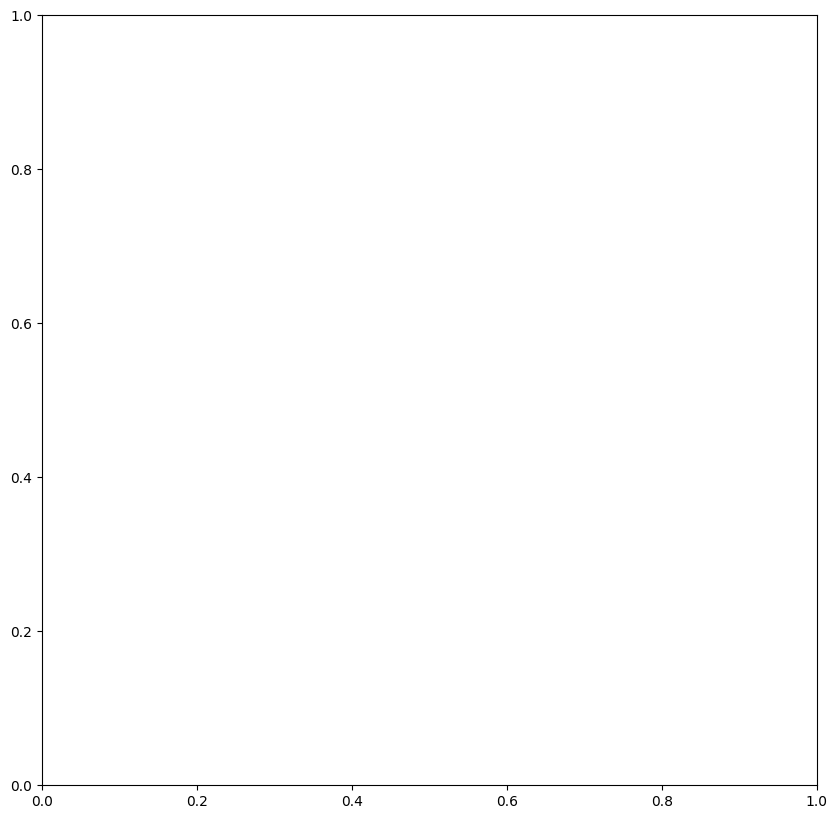

In [55]:
import numpy as np
import random

# Simulate an invasion
def invade(map_data, attacker, defender):
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == defender:
                # Check if the defender cell has a neighboring attacker cell
                neighbors = [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        if map_data[ni, nj] == attacker:
                            # Temporarily invade
                            map_data[i, j] = attacker
                            # Check contiguity of defender's remaining land
                            regions = find_connected_regions(map_data, defender)
                            if len(regions) > 1:  # If the defender's land is split
                                map_data[i, j] = defender  # Undo the invasion
                                return False  # Invasion rejected
                            return True  # Successful invasion
    return False  # No invasion occurred

# Find connected regions for a specific country
def find_connected_regions(map_data, country_id):
    visited = set()
    regions = []

    def flood_fill(i, j):
        stack = [(i, j)]
        region = []
        while stack:
            x, y = stack.pop()
            if (x, y) not in visited and 0 <= x < map_size and 0 <= y < map_size and map_data[x, y] == country_id:
                visited.add((x, y))
                region.append((x, y))
                # Add neighbors
                stack.extend([(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])
        return region

    for i in range(map_size):
        for j in range(map_size):
            if (i, j) not in visited and map_data[i, j] == country_id:
                region = flood_fill(i, j)
                if region:
                    regions.append(region)
    return regions

# Find neighboring countries
def find_neighbors(map_data, country_id):
    neighbors = set()
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == country_id:
                # Check all neighbors
                for ni, nj in [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        neighbor = map_data[ni, nj]
                        if neighbor != country_id:  # Exclude itself
                            neighbors.add(neighbor)
    return neighbors

# Simulate a random turn
def random_turn(map_data, stable_countries, countries):
    # Get the list of countries that can attack
    potential_attackers = [c for c in countries if c not in stable_countries]

    # Randomly shuffle the attackers
    random.shuffle(potential_attackers)

    # Randomly pair attackers and defenders
    for attacker in potential_attackers:
        # Find all neighboring countries
        neighbors = find_neighbors(map_data, attacker)
        # Exclude stable countries from being attacked
        valid_targets = [n for n in neighbors if n not in stable_countries]
        if valid_targets:
            # Randomly select a defender from valid targets
            defender = random.choice(valid_targets)
            # Perform the invasion
            print(f"Country {attacker} attacks Country {defender}")
            invade(map_data, attacker, defender)



# Define stable countries
stable_countries = {}  # These countries are stable and cannot attack or be attacked

# All countries present in the map
countries = set(np.unique(map_data))

# Run multiple turns
for turn in range(10):
    print(f"\nTurn {turn + 1}")
    random_turn(map_data, stable_countries, countries)
    draw_map(map_data)


## WRITE COUNTRY NAME IN THE MIDDLE


Turn 1
Country 29 attacks Country 6
Country 24 attacks Country 33
Country 36 attacks Country 2
Country 30 attacks Country 29
Country 38 attacks Country 26
Country 5 attacks Country 3
Country 34 attacks Country 30
Country 26 attacks Country 4
Country 4 attacks Country 26
Country 3 attacks Country 0
Country 25 attacks Country 1
Country 2 attacks Country 7
Country 33 attacks Country 5
Country 32 attacks Country 20
Country 20 attacks Country 4
Country 27 attacks Country 32
Country 1 attacks Country 38
Country 0 attacks Country 1
Country 6 attacks Country 24
Country 7 attacks Country 20

Turn 2
Country 0 attacks Country 26
Country 2 attacks Country 25
Country 20 attacks Country 34
Country 26 attacks Country 0
Country 32 attacks Country 0
Country 33 attacks Country 6
Country 5 attacks Country 32
Country 7 attacks Country 4
Country 36 attacks Country 7
Country 6 attacks Country 34
Country 30 attacks Country 29
Country 38 attacks Country 1
Country 4 attacks Country 20
Country 27 attacks Count

KeyError: np.int64(25)

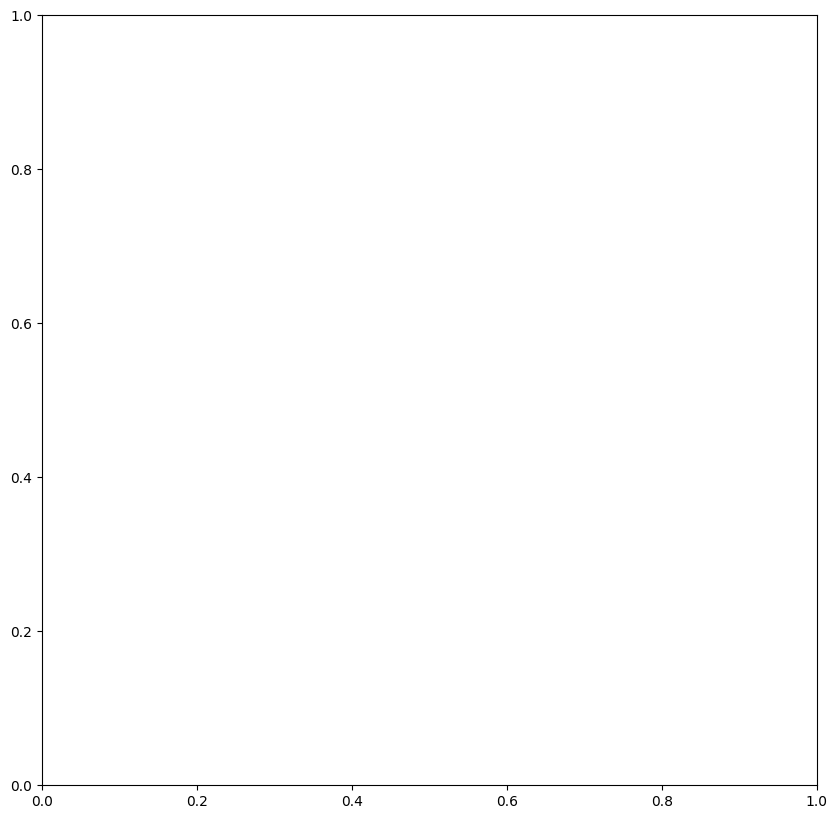

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Simulate an invasion
def invade(map_data, attacker, defender):
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == defender:
                # Check if the defender cell has a neighboring attacker cell
                neighbors = [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        if map_data[ni, nj] == attacker:
                            # Temporarily invade
                            map_data[i, j] = attacker
                            # Check contiguity of defender's remaining land
                            regions = find_connected_regions(map_data, defender)
                            if len(regions) > 1:  # If the defender's land is split
                                map_data[i, j] = defender  # Undo the invasion
                                return False  # Invasion rejected
                            return True  # Successful invasion
    return False  # No invasion occurred

# Find connected regions for a specific country
def find_connected_regions(map_data, country_id):
    visited = set()
    regions = []

    def flood_fill(i, j):
        stack = [(i, j)]
        region = []
        while stack:
            x, y = stack.pop()
            if (x, y) not in visited and 0 <= x < map_size and 0 <= y < map_size and map_data[x, y] == country_id:
                visited.add((x, y))
                region.append((x, y))
                # Add neighbors
                stack.extend([(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)])
        return region

    for i in range(map_size):
        for j in range(map_size):
            if (i, j) not in visited and map_data[i, j] == country_id:
                region = flood_fill(i, j)
                if region:
                    regions.append(region)
    return regions

# Find neighboring countries
def find_neighbors(map_data, country_id):
    neighbors = set()
    for i in range(map_size):
        for j in range(map_size):
            if map_data[i, j] == country_id:
                # Check all neighbors
                for ni, nj in [
                    (i - 1, j),  # Above
                    (i + 1, j),  # Below
                    (i, j - 1),  # Left
                    (i, j + 1),  # Right
                ]:
                    if 0 <= ni < map_size and 0 <= nj < map_size:  # Ensure within bounds
                        neighbor = map_data[ni, nj]
                        if neighbor != country_id:  # Exclude itself
                            neighbors.add(neighbor)
    return neighbors

# Simulate a random turn
def random_turn(map_data, stable_countries, countries):
    # Get the list of countries that can attack
    potential_attackers = [c for c in countries if c not in stable_countries]

    # Randomly shuffle the attackers
    random.shuffle(potential_attackers)

    # Randomly pair attackers and defenders
    for attacker in potential_attackers:
        # Find all neighboring countries
        neighbors = find_neighbors(map_data, attacker)
        # Exclude stable countries from being attacked
        valid_targets = [n for n in neighbors if n not in stable_countries]
        if valid_targets:
            # Randomly select a defender from valid targets
            defender = random.choice(valid_targets)
            # Perform the invasion
            print(f"Country {attacker} attacks Country {defender}")
            invade(map_data, attacker, defender)

# Draw the map
def draw_map(map_data):
    plt.figure(figsize=(10, 10))
    country_positions = {}  # To store calculated center positions for country names

    # Draw the map and collect all positions for each country
    for i in range(map_size):
        for j in range(map_size):
            # Draw the colored cell
            plt.gca().add_patch(plt.Rectangle((j, map_size - i - 1), 1, 1, color=colors[map_data[i, j]]))

            # Collect positions for each country
            country_id = map_data[i, j]
            if country_id not in country_positions:
                country_positions[country_id] = []
            country_positions[country_id].append((j + 0.5, map_size - i - 1 + 0.5))

    # Calculate the center position for each country and place its name
    for country, positions in country_positions.items():
        if len(positions) > 0:  # Ensure the country still has land
            avg_x = sum(x for x, y in positions) / len(positions)
            avg_y = sum(y for x, y in positions) / len(positions)
            if country in country_names:  # Ensure the country has a name
                plt.text(avg_x, avg_y, country_names[country], 
                         ha="center", va="center", fontsize=8, color="black", weight="bold")

    # Configure map display
    plt.xlim(0, map_size)
    plt.ylim(0, map_size)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_aspect('equal')
    plt.show()


# Country names and colors
country_names = {
    0: "UU EMPIRE",
    1: "YELIZ EMPIRE",
    2: "STATE of SEDAT",
    3: "UNITED KINGDOM",
    4: "OTTOMANS",
    5: "USA",
    6: "GERMAN EMPIRE",
    7: "USSR"
}

colors = {
    0: "blue",
    1: "green",
    2: "red",
    3: "yellow",
    4: "purple",
    5: "orange",
    6: "brown",
    7: "pink",
}

# Define stable countries
stable_countries = set()  # These countries are stable and cannot attack or be attacked

# All countries present in the map
countries = set(np.unique(map_data))

# Run multiple turns
for turn in range(100):
    print(f"\nTurn {turn + 1}")
    random_turn(map_data, stable_countries, countries)

# Show the final map after 50 turns
print("\nFinal Map:")
draw_map(map_data)



## ITERATIONS


Turn 1
Country 3 attacks Country 1
Country 2 attacks Country 1
Country 1 attacks Country 4
Country 6 attacks Country 7
Country 0 attacks Country 1
Country 5 attacks Country 4
Country 7 attacks Country 6
Country 4 attacks Country 6


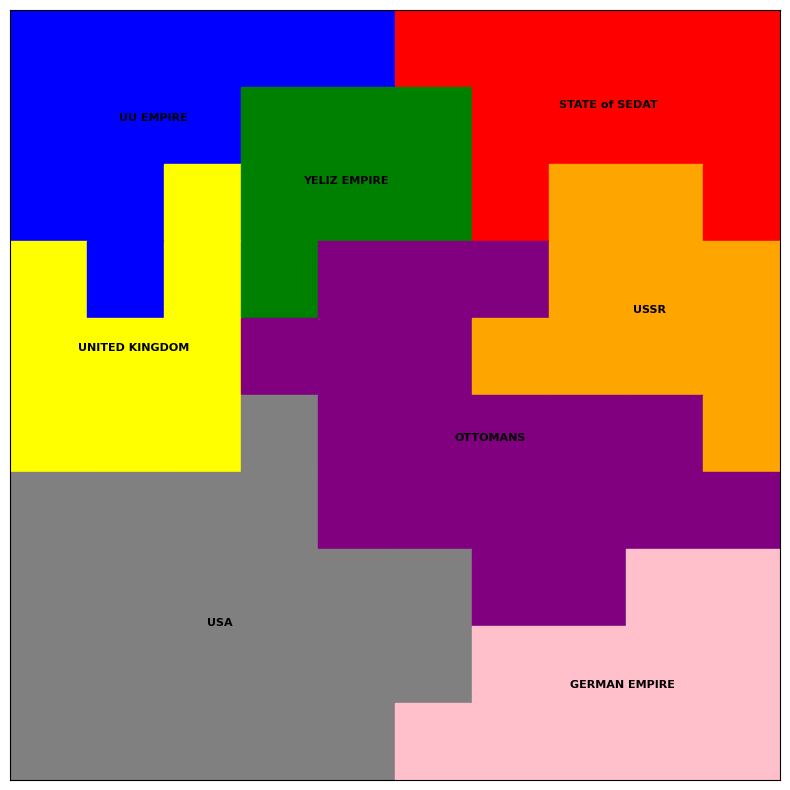


Turn 2
Country 6 attacks Country 4
Country 0 attacks Country 1
Country 2 attacks Country 7
Country 3 attacks Country 4
Country 4 attacks Country 6
Country 5 attacks Country 4
Country 1 attacks Country 4
Country 7 attacks Country 2


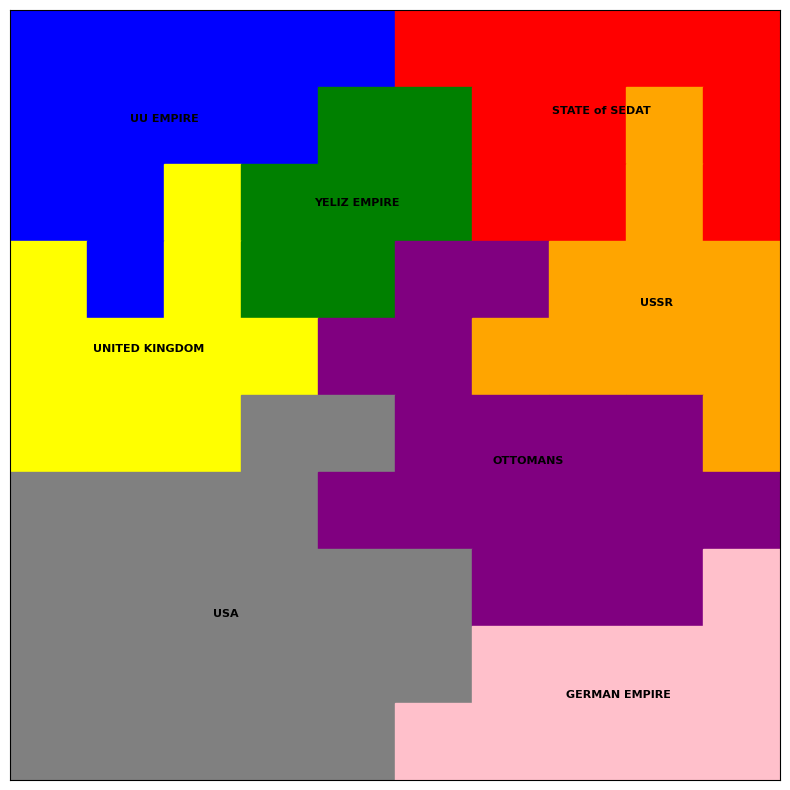


Turn 3
Country 1 attacks Country 3
Country 2 attacks Country 4
Country 7 attacks Country 4
Country 3 attacks Country 0
Country 4 attacks Country 7
Country 6 attacks Country 4
Country 5 attacks Country 6
Country 0 attacks Country 1


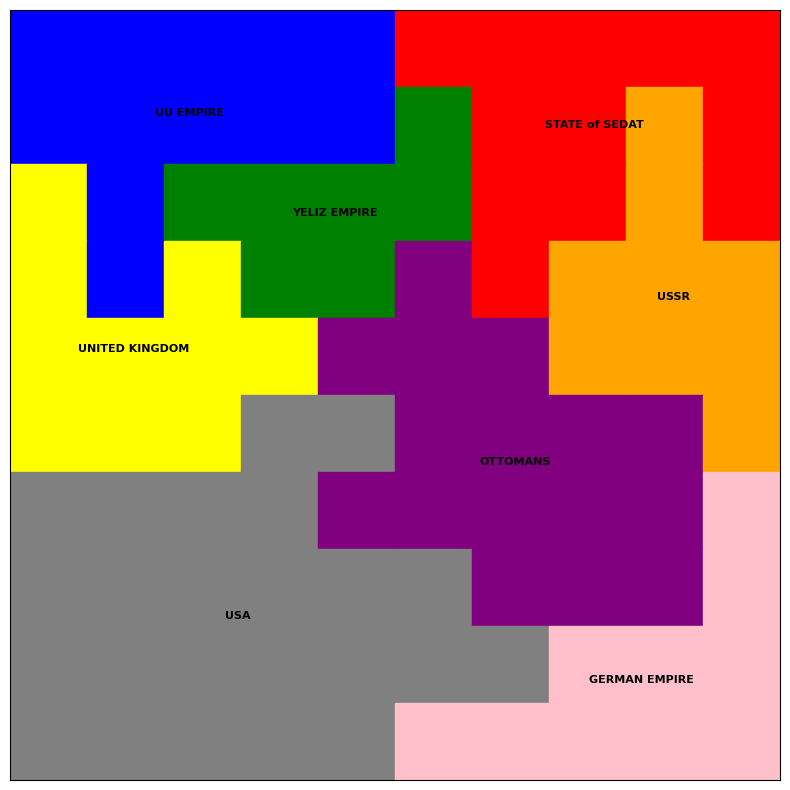


Turn 4
Country 1 attacks Country 0
Country 7 attacks Country 2
Country 3 attacks Country 4
Country 0 attacks Country 1
Country 4 attacks Country 1
Country 5 attacks Country 6
Country 6 attacks Country 5
Country 2 attacks Country 1


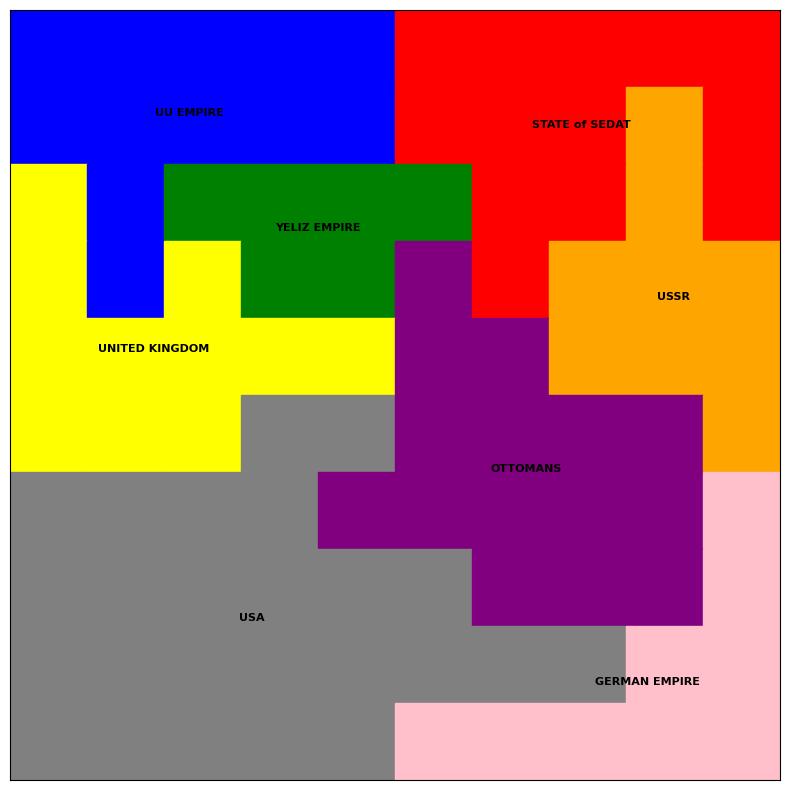


Turn 5
Country 1 attacks Country 0
Country 4 attacks Country 6
Country 2 attacks Country 1
Country 5 attacks Country 6
Country 0 attacks Country 1
Country 3 attacks Country 5
Country 6 attacks Country 5
Country 7 attacks Country 2


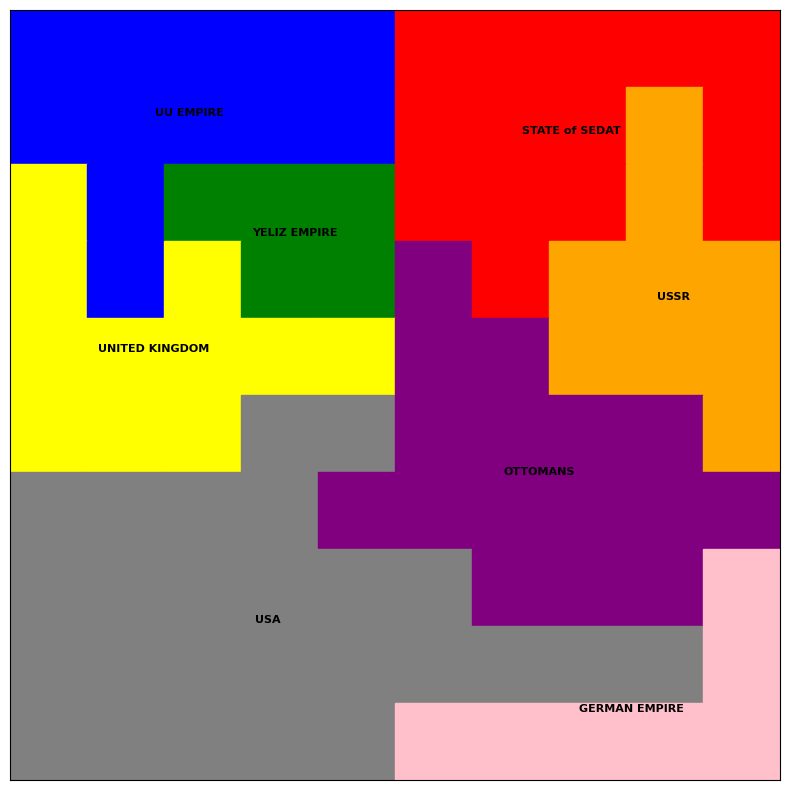


Turn 6
Country 5 attacks Country 4
Country 1 attacks Country 3
Country 7 attacks Country 2
Country 4 attacks Country 6
Country 3 attacks Country 5
Country 2 attacks Country 0
Country 0 attacks Country 2
Country 6 attacks Country 4


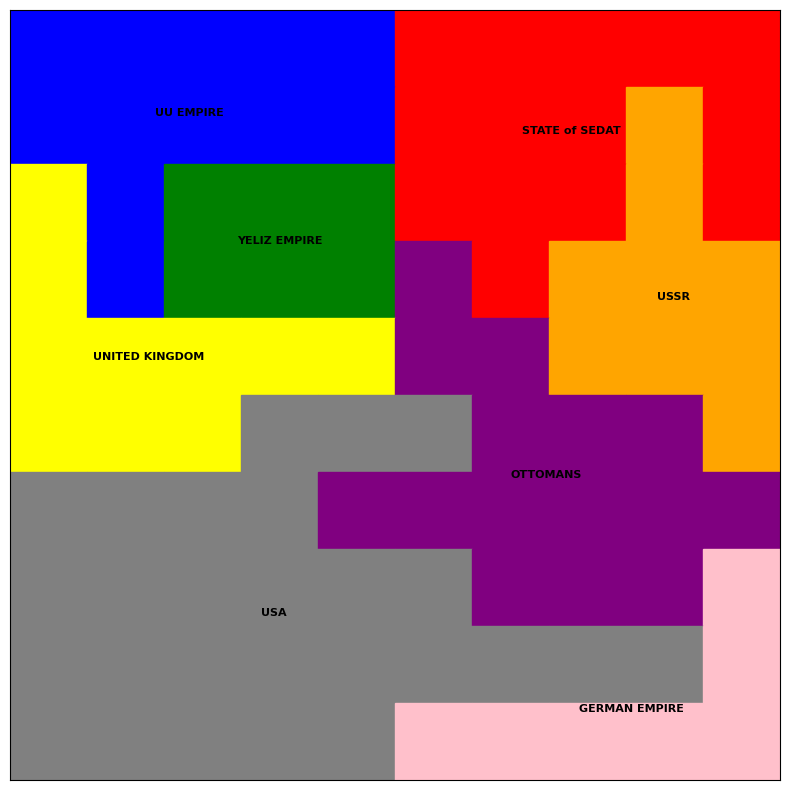


Turn 7
Country 3 attacks Country 5
Country 4 attacks Country 5
Country 0 attacks Country 3
Country 1 attacks Country 0
Country 7 attacks Country 2
Country 5 attacks Country 4
Country 2 attacks Country 0
Country 6 attacks Country 5


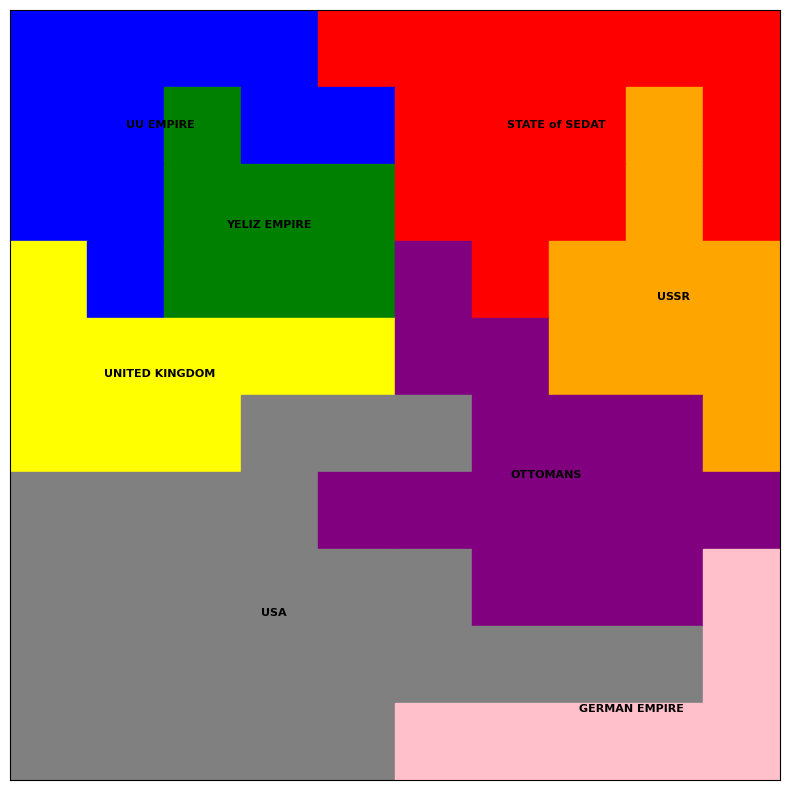


Turn 8
Country 4 attacks Country 2
Country 7 attacks Country 4
Country 1 attacks Country 4
Country 5 attacks Country 3
Country 3 attacks Country 5
Country 2 attacks Country 4
Country 0 attacks Country 3
Country 6 attacks Country 5


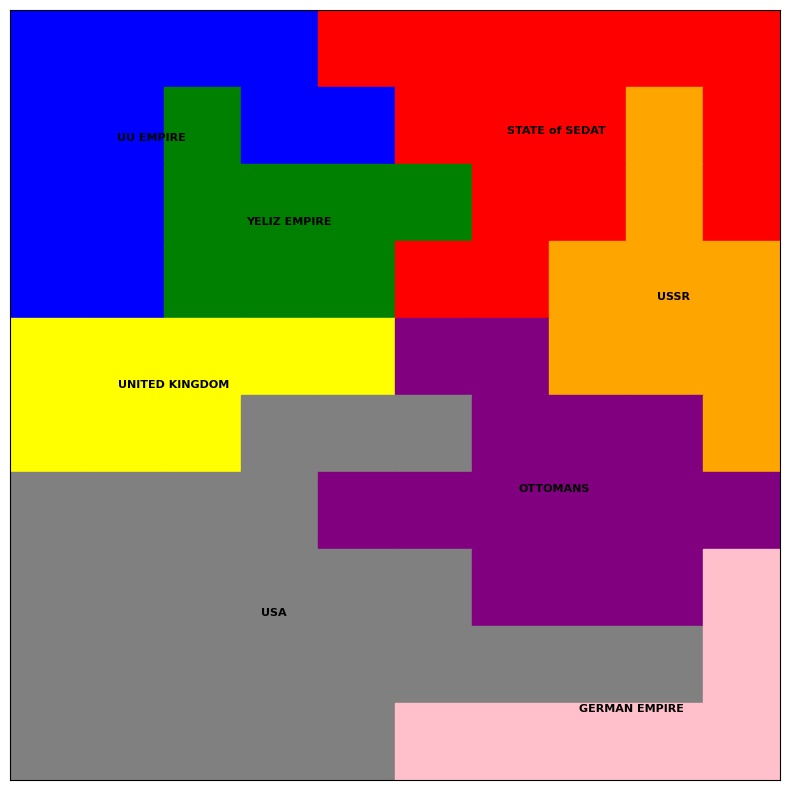


Turn 9
Country 1 attacks Country 3
Country 3 attacks Country 5
Country 2 attacks Country 0
Country 4 attacks Country 5
Country 5 attacks Country 4
Country 6 attacks Country 4
Country 0 attacks Country 2
Country 7 attacks Country 4


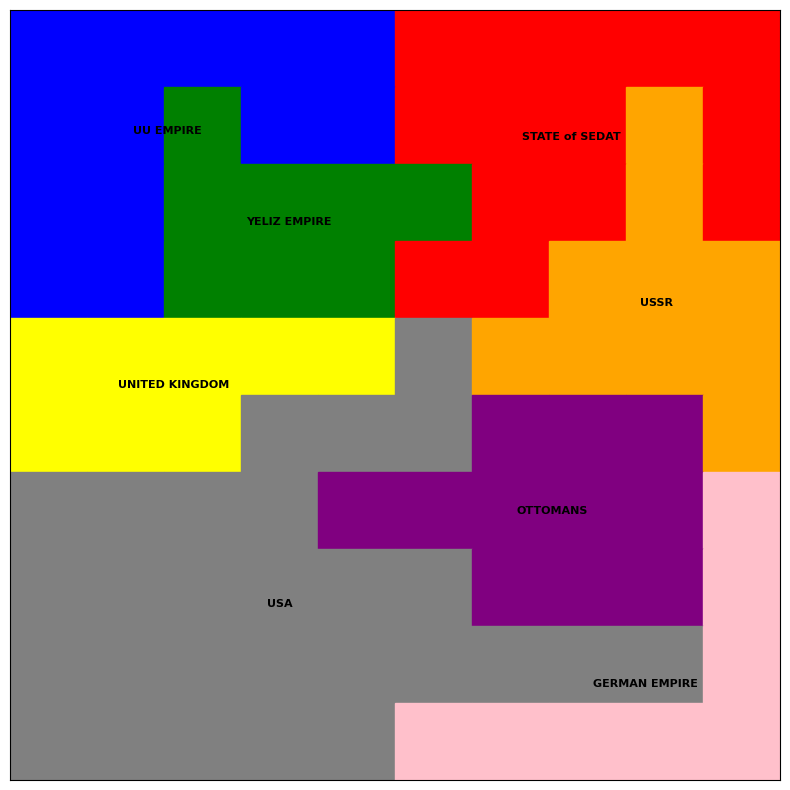


Turn 10
Country 2 attacks Country 5
Country 7 attacks Country 2
Country 4 attacks Country 7
Country 1 attacks Country 2
Country 6 attacks Country 4
Country 0 attacks Country 1
Country 5 attacks Country 6
Country 3 attacks Country 5


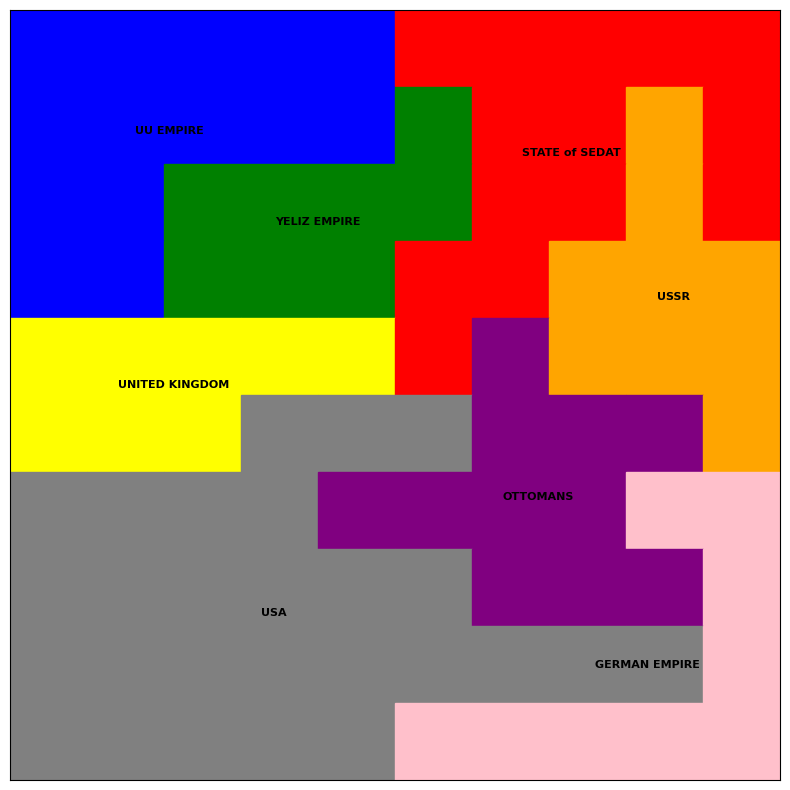


Turn 11
Country 2 attacks Country 0
Country 0 attacks Country 3
Country 3 attacks Country 5
Country 1 attacks Country 0
Country 6 attacks Country 5
Country 4 attacks Country 2
Country 5 attacks Country 4
Country 7 attacks Country 6


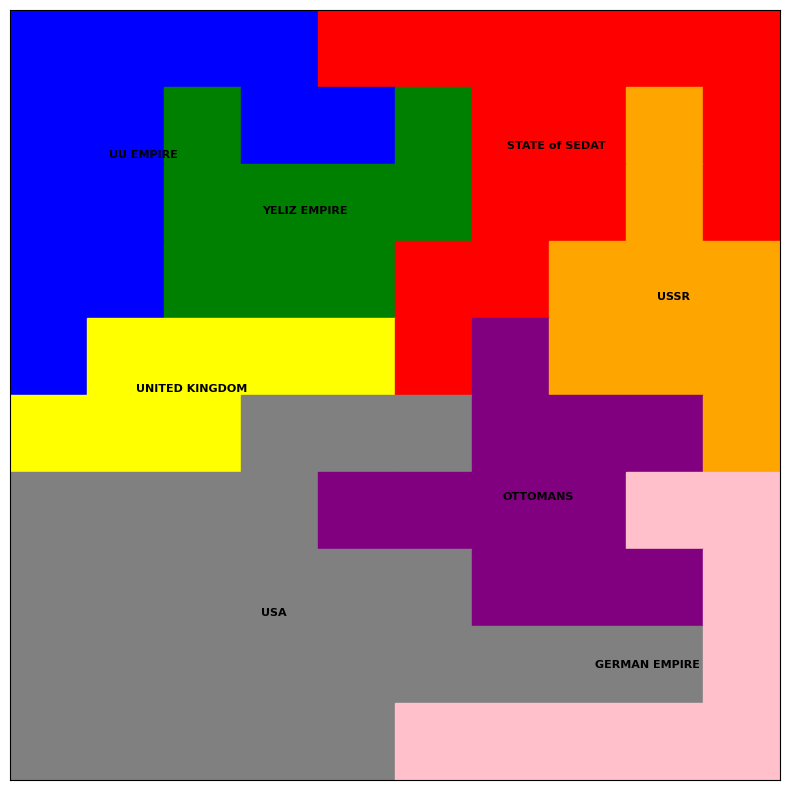


Turn 12
Country 6 attacks Country 4
Country 4 attacks Country 5
Country 7 attacks Country 6
Country 0 attacks Country 2
Country 5 attacks Country 3
Country 1 attacks Country 3
Country 2 attacks Country 3
Country 3 attacks Country 2


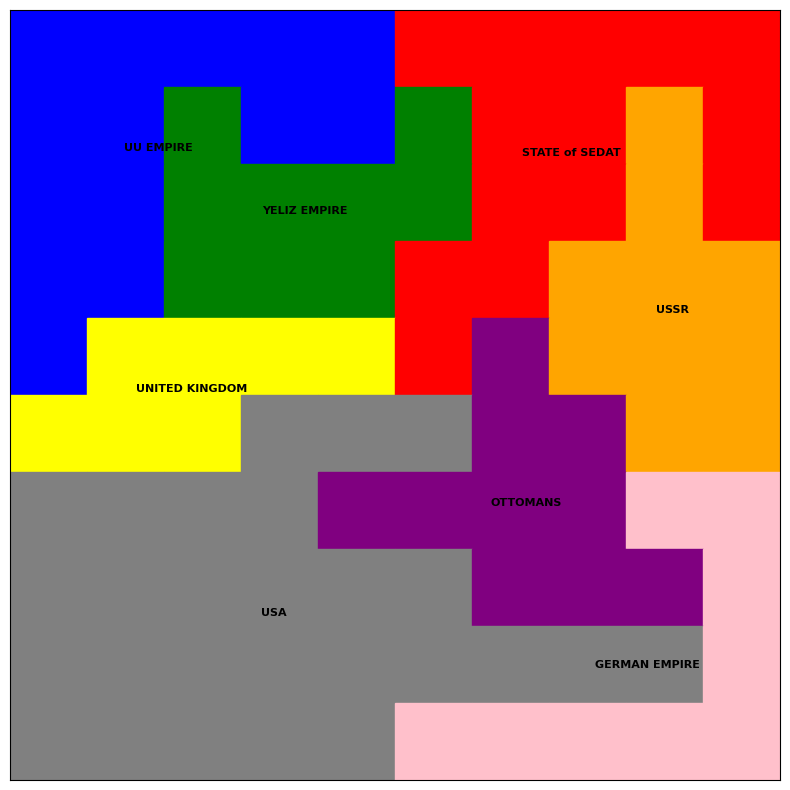


Turn 13
Country 0 attacks Country 2
Country 4 attacks Country 5
Country 6 attacks Country 5
Country 5 attacks Country 2
Country 1 attacks Country 3
Country 2 attacks Country 5
Country 3 attacks Country 2
Country 7 attacks Country 2


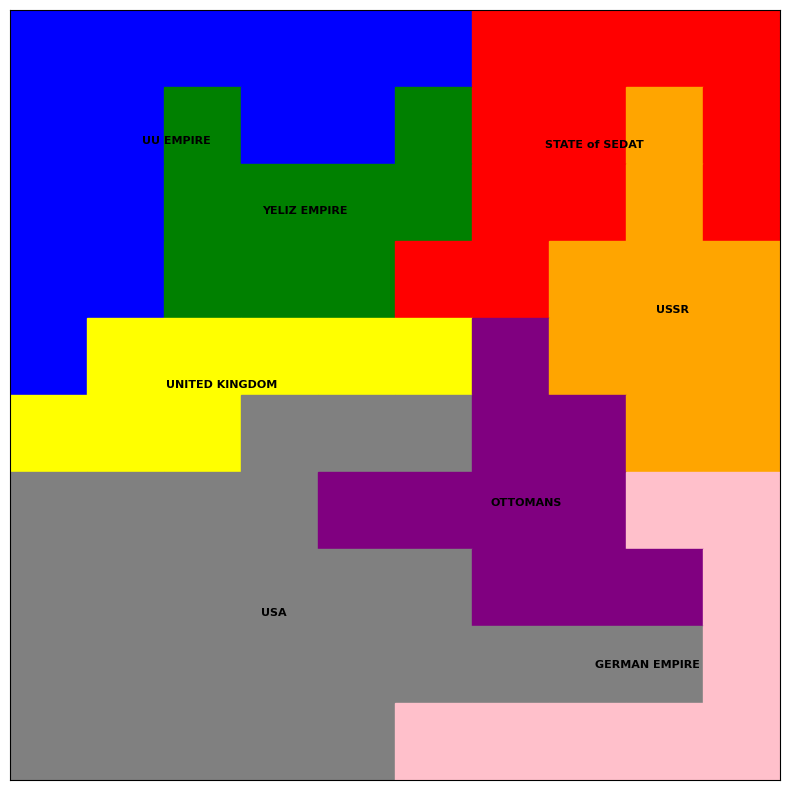


Turn 14
Country 4 attacks Country 2
Country 0 attacks Country 2
Country 3 attacks Country 0
Country 2 attacks Country 0
Country 6 attacks Country 7
Country 5 attacks Country 6
Country 7 attacks Country 6
Country 1 attacks Country 3


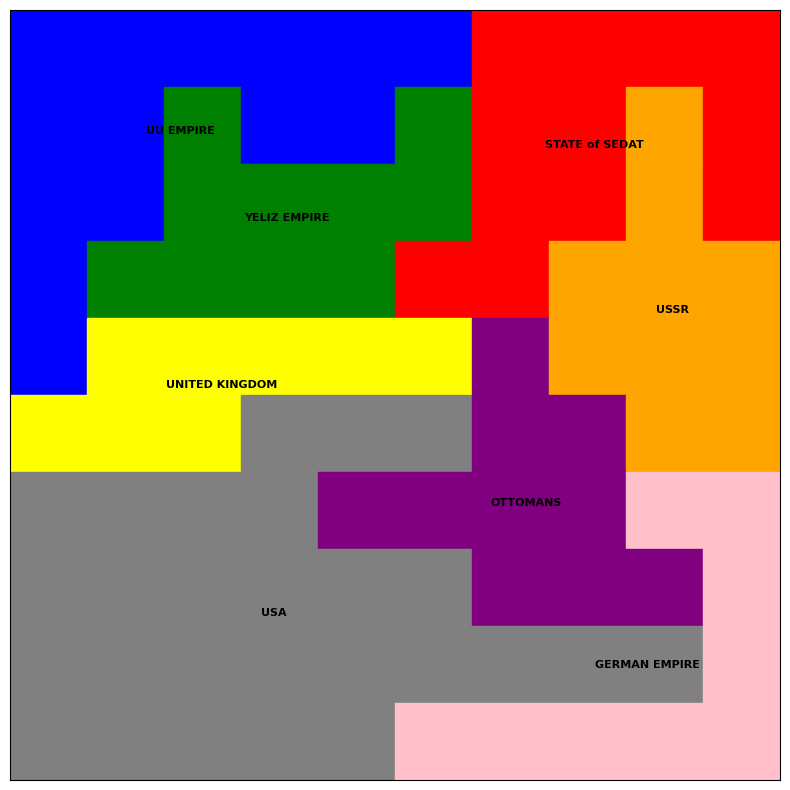


Turn 15
Country 5 attacks Country 6
Country 3 attacks Country 4
Country 7 attacks Country 3
Country 6 attacks Country 5
Country 4 attacks Country 6
Country 0 attacks Country 2
Country 2 attacks Country 7
Country 1 attacks Country 2


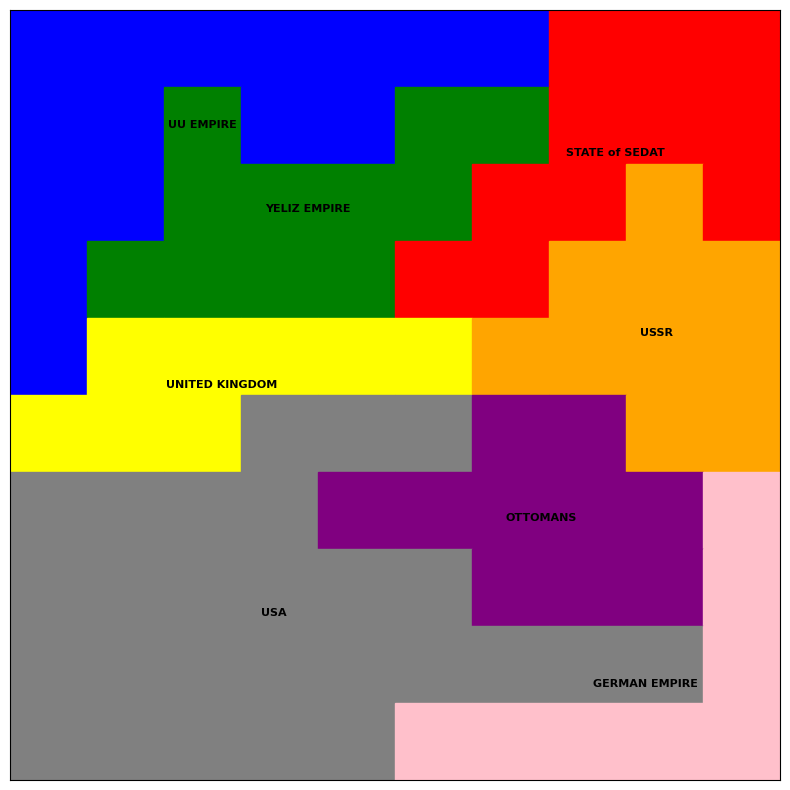


Turn 16
Country 3 attacks Country 2
Country 5 attacks Country 6
Country 2 attacks Country 1
Country 6 attacks Country 4
Country 7 attacks Country 6
Country 4 attacks Country 7
Country 0 attacks Country 3
Country 1 attacks Country 3


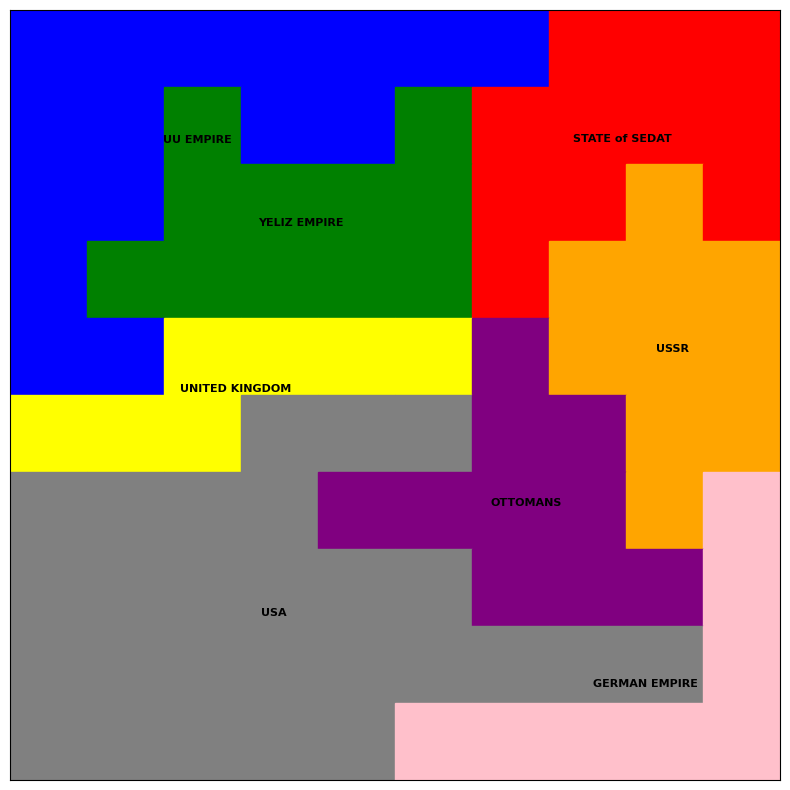


Turn 17
Country 6 attacks Country 4
Country 1 attacks Country 0
Country 0 attacks Country 2
Country 4 attacks Country 6
Country 3 attacks Country 4
Country 2 attacks Country 1
Country 5 attacks Country 4
Country 7 attacks Country 3


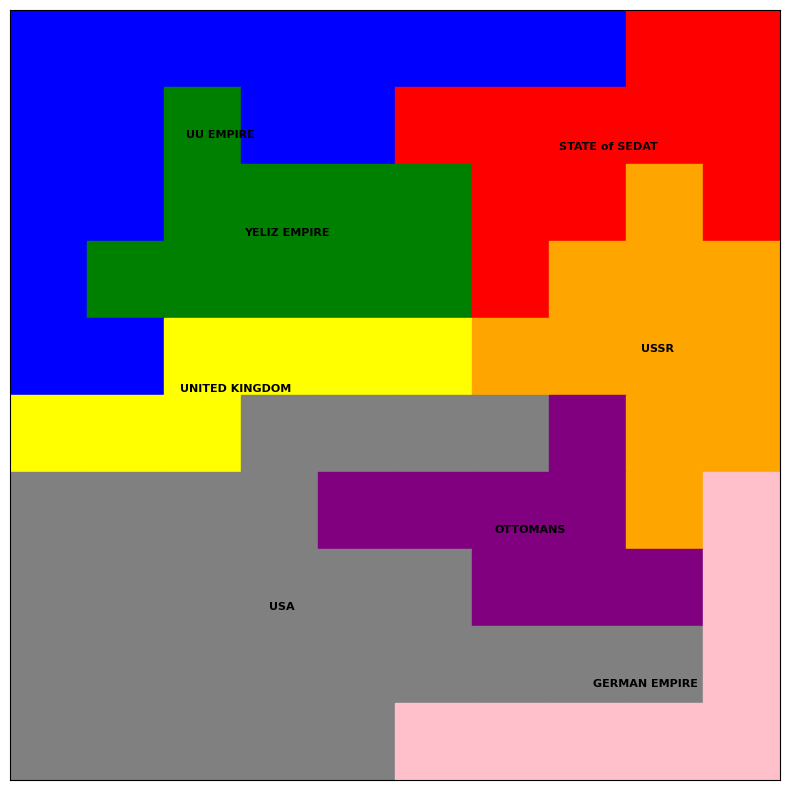


Turn 18
Country 7 attacks Country 5
Country 3 attacks Country 0
Country 1 attacks Country 2
Country 0 attacks Country 3
Country 6 attacks Country 4
Country 5 attacks Country 6
Country 2 attacks Country 0
Country 4 attacks Country 5


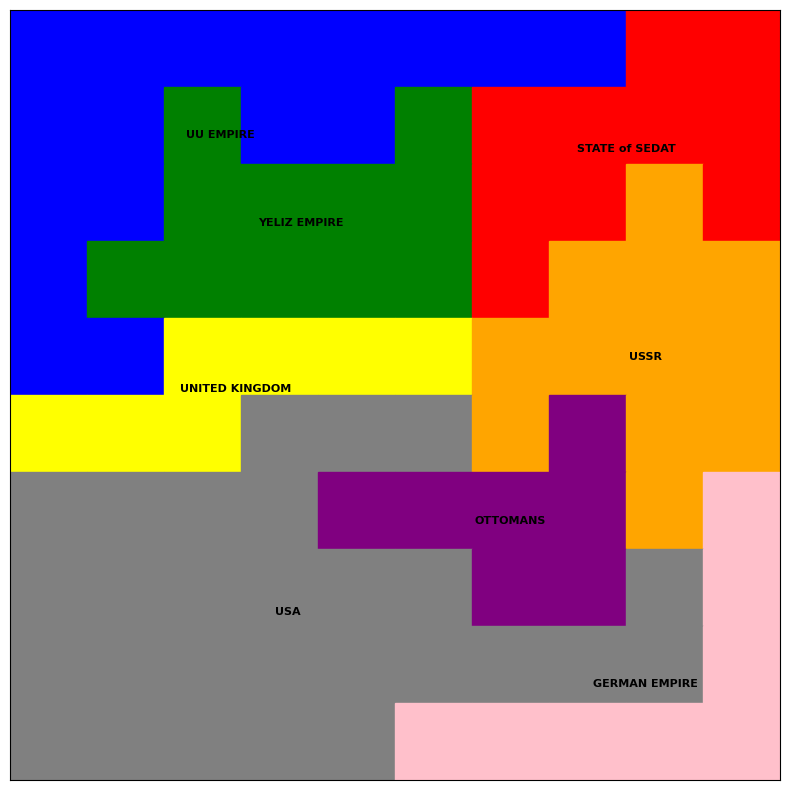


Turn 19
Country 6 attacks Country 5
Country 3 attacks Country 0
Country 4 attacks Country 5
Country 0 attacks Country 2
Country 2 attacks Country 0
Country 5 attacks Country 4
Country 7 attacks Country 5
Country 1 attacks Country 2


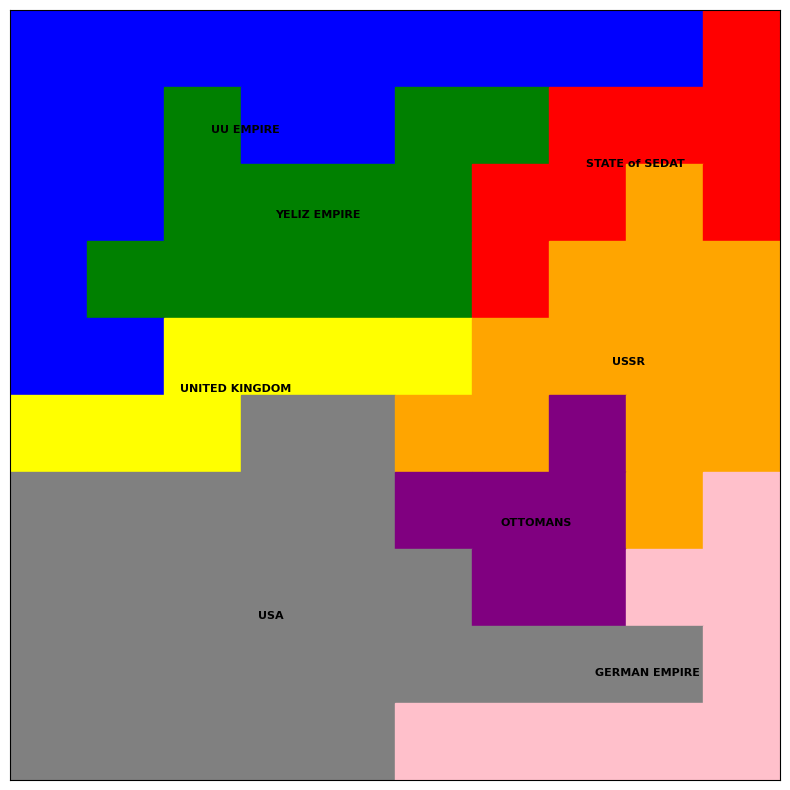


Turn 20
Country 6 attacks Country 4
Country 4 attacks Country 5
Country 0 attacks Country 2
Country 7 attacks Country 4
Country 1 attacks Country 3
Country 2 attacks Country 7
Country 5 attacks Country 4
Country 3 attacks Country 5


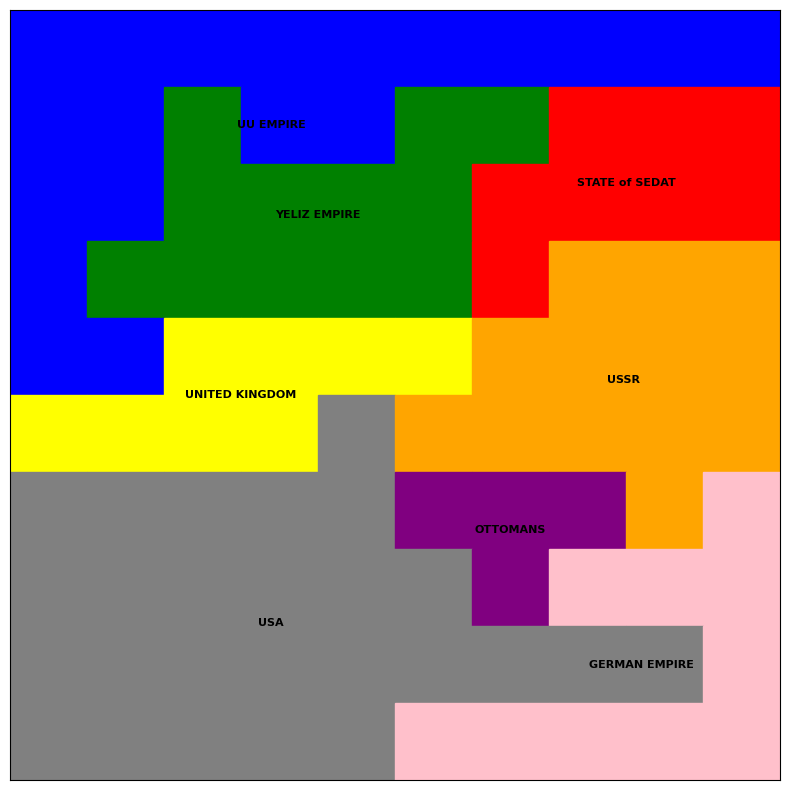


Turn 21
Country 6 attacks Country 5
Country 4 attacks Country 5
Country 1 attacks Country 2
Country 0 attacks Country 3
Country 3 attacks Country 0
Country 7 attacks Country 2
Country 5 attacks Country 4
Country 2 attacks Country 0


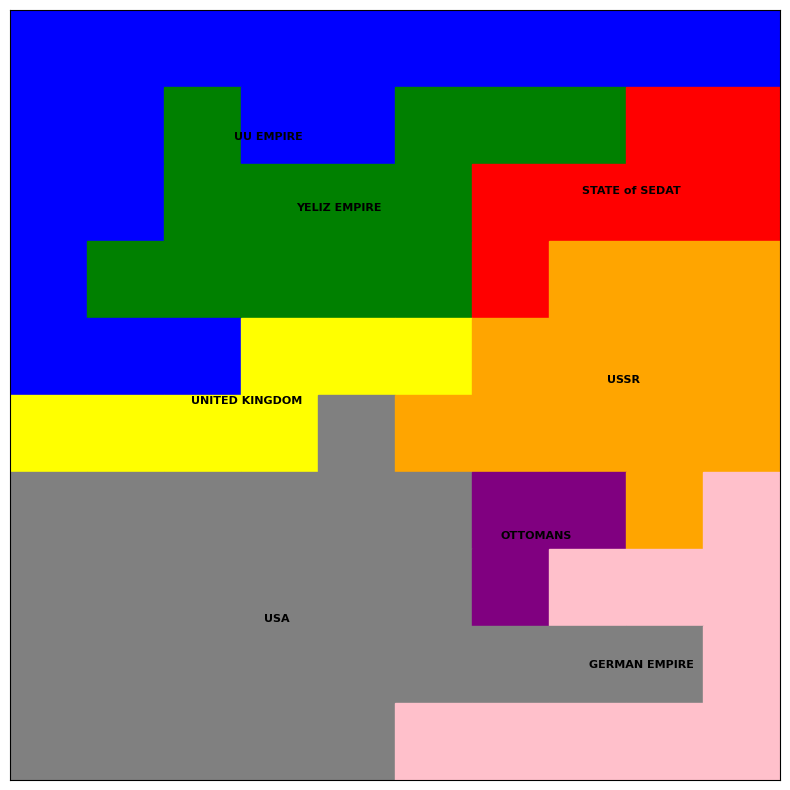


Turn 22
Country 3 attacks Country 7
Country 4 attacks Country 6
Country 0 attacks Country 1
Country 1 attacks Country 0
Country 2 attacks Country 7
Country 6 attacks Country 4
Country 5 attacks Country 4
Country 7 attacks Country 3


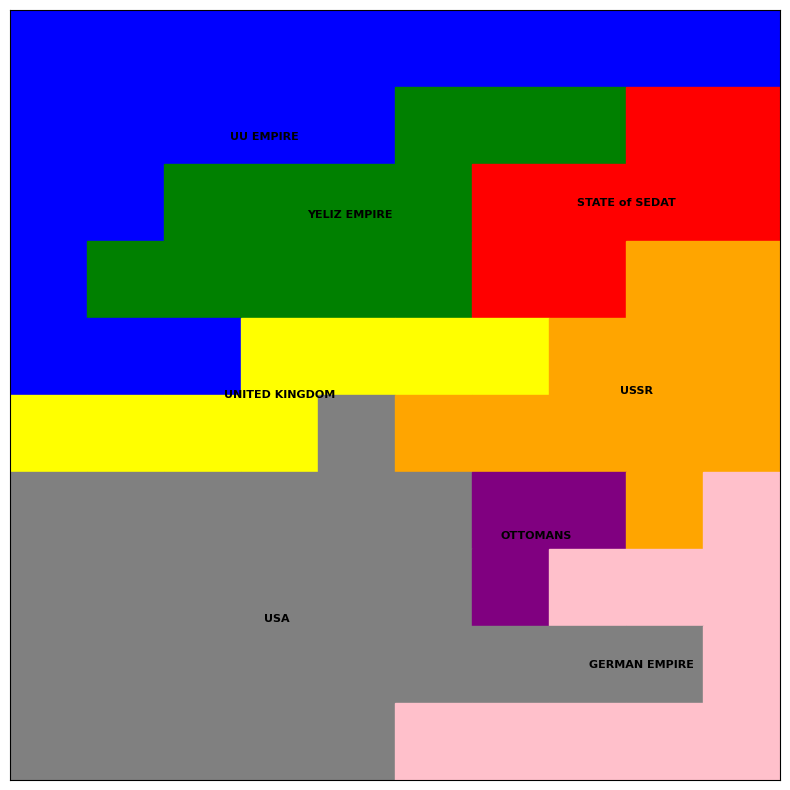


Turn 23
Country 3 attacks Country 5
Country 5 attacks Country 3
Country 0 attacks Country 2
Country 4 attacks Country 5
Country 7 attacks Country 6
Country 6 attacks Country 4
Country 2 attacks Country 3
Country 1 attacks Country 2


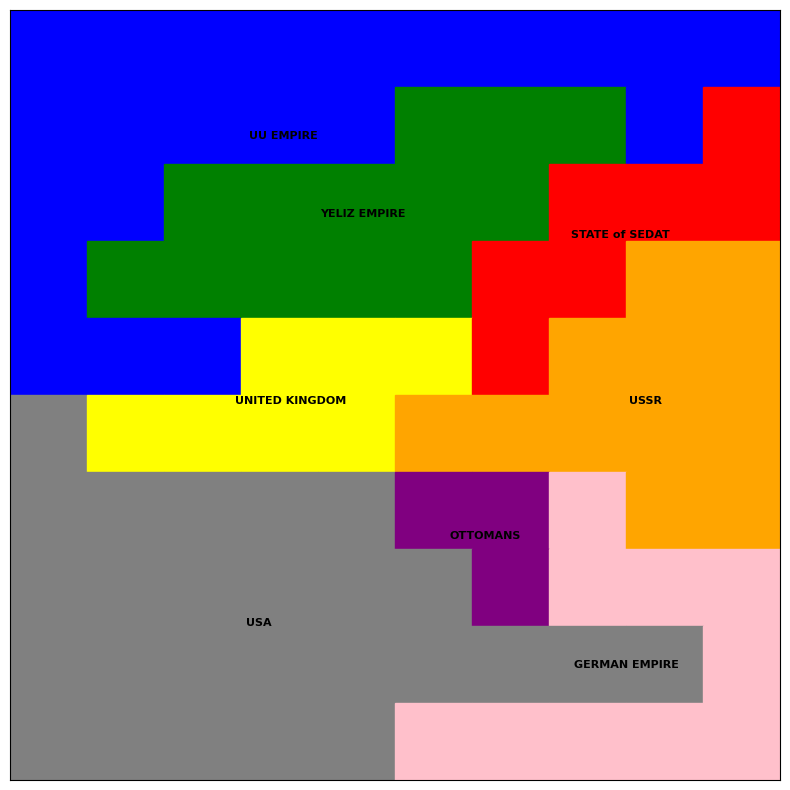


Turn 24
Country 4 attacks Country 7
Country 3 attacks Country 0
Country 7 attacks Country 2
Country 2 attacks Country 7
Country 1 attacks Country 0
Country 0 attacks Country 5
Country 6 attacks Country 7
Country 5 attacks Country 3


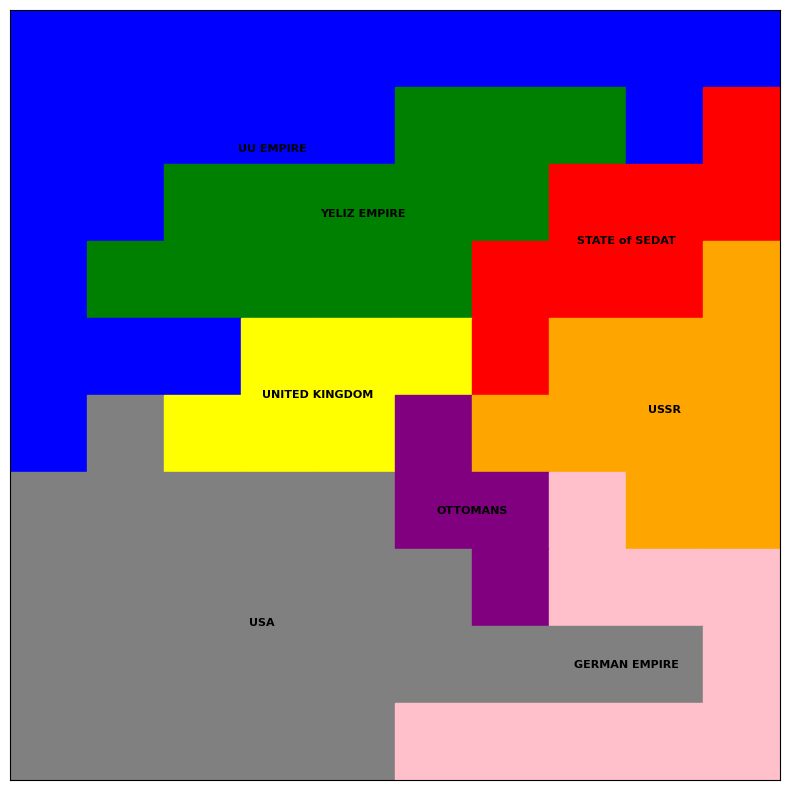


Turn 25
Country 3 attacks Country 0
Country 6 attacks Country 5
Country 4 attacks Country 6
Country 0 attacks Country 1
Country 1 attacks Country 3
Country 5 attacks Country 6
Country 7 attacks Country 6
Country 2 attacks Country 0


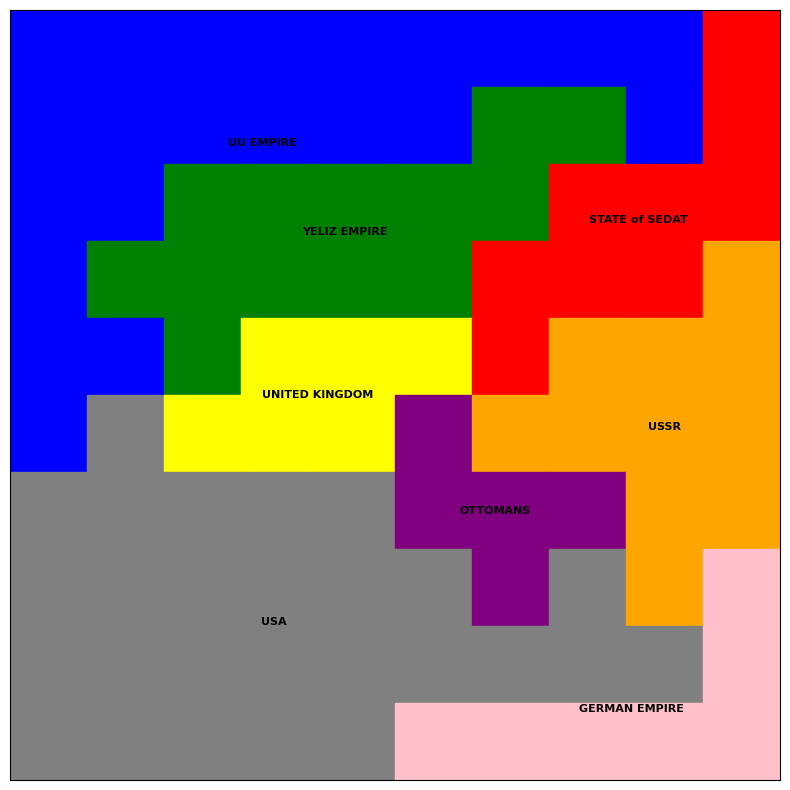


Turn 26
Country 2 attacks Country 3
Country 7 attacks Country 6
Country 5 attacks Country 7
Country 6 attacks Country 7
Country 0 attacks Country 2
Country 1 attacks Country 0
Country 4 attacks Country 5
Country 3 attacks Country 1


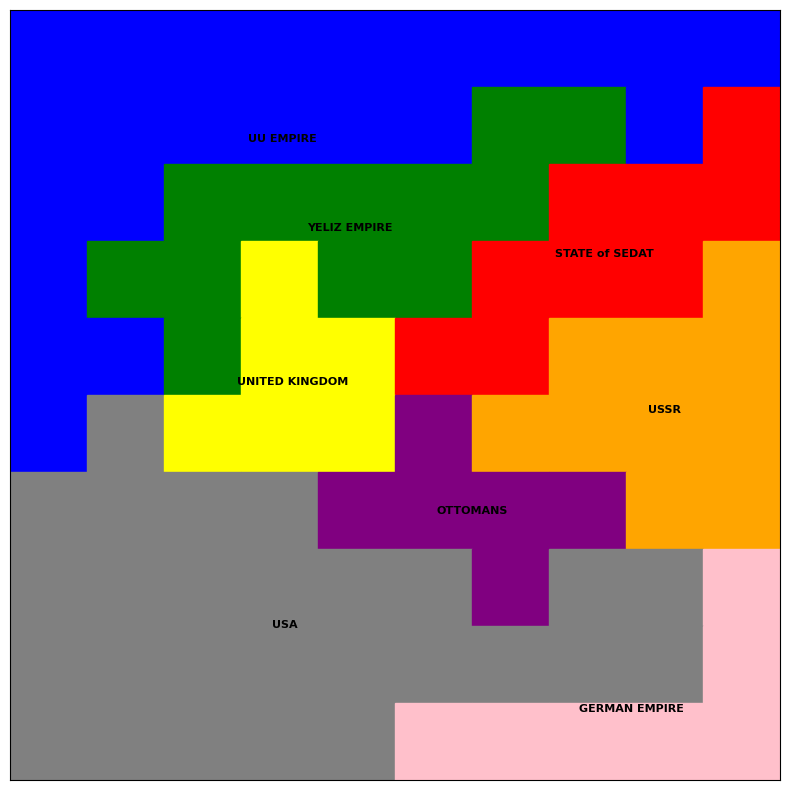


Turn 27
Country 1 attacks Country 2
Country 5 attacks Country 4
Country 2 attacks Country 0
Country 3 attacks Country 1
Country 6 attacks Country 7
Country 7 attacks Country 5
Country 4 attacks Country 2
Country 0 attacks Country 2


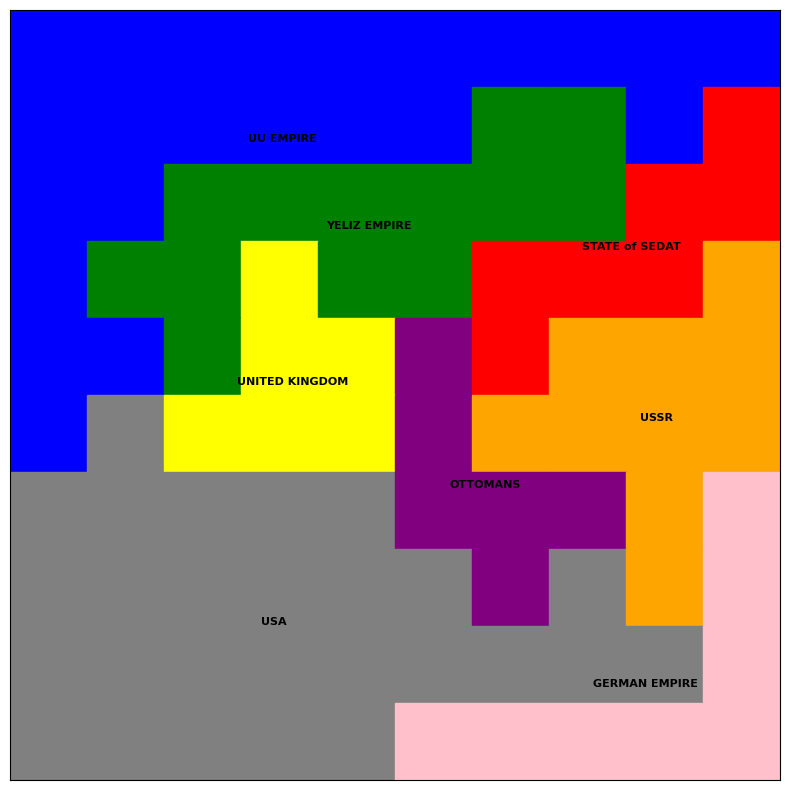


Turn 28
Country 5 attacks Country 7
Country 2 attacks Country 7
Country 0 attacks Country 2
Country 4 attacks Country 5
Country 1 attacks Country 0
Country 6 attacks Country 7
Country 3 attacks Country 1
Country 7 attacks Country 4


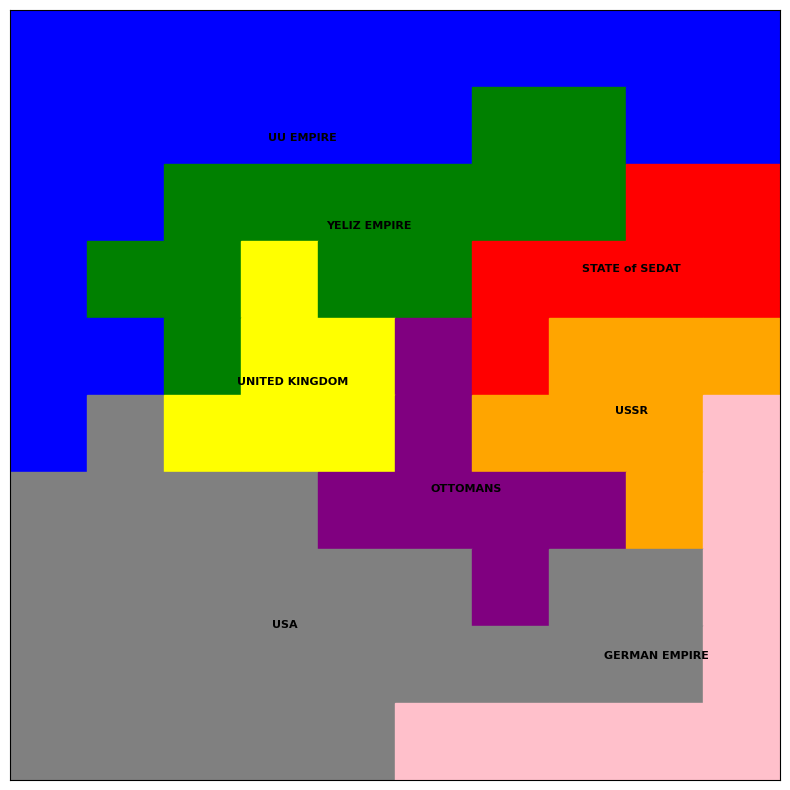


Turn 29
Country 7 attacks Country 4
Country 0 attacks Country 1
Country 6 attacks Country 5
Country 3 attacks Country 4
Country 4 attacks Country 7
Country 1 attacks Country 0
Country 5 attacks Country 4
Country 2 attacks Country 3


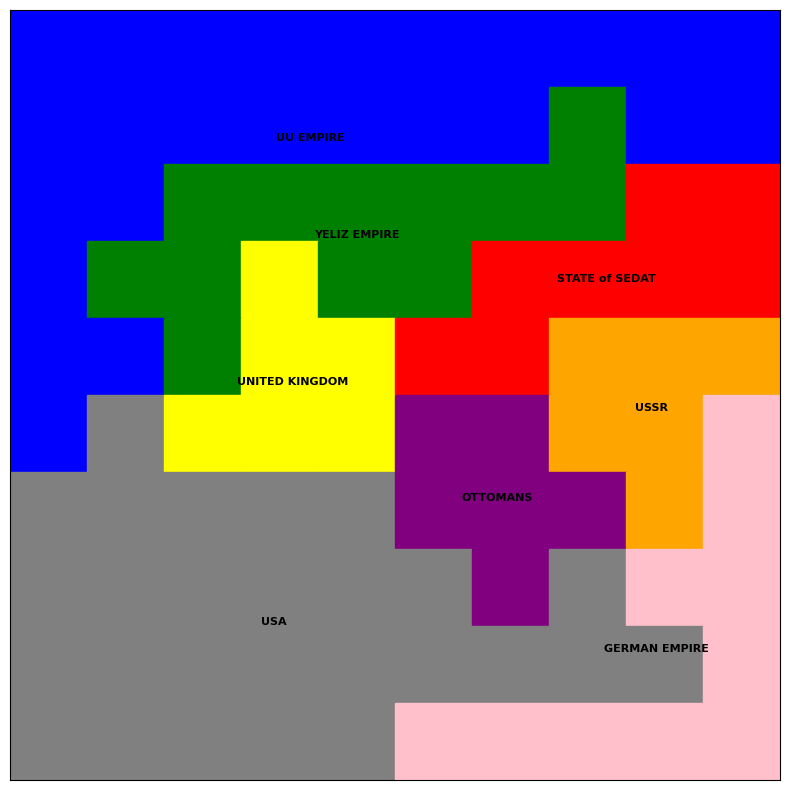


Turn 30
Country 0 attacks Country 2
Country 1 attacks Country 3
Country 6 attacks Country 5
Country 5 attacks Country 3
Country 2 attacks Country 1
Country 3 attacks Country 2
Country 7 attacks Country 6
Country 4 attacks Country 2


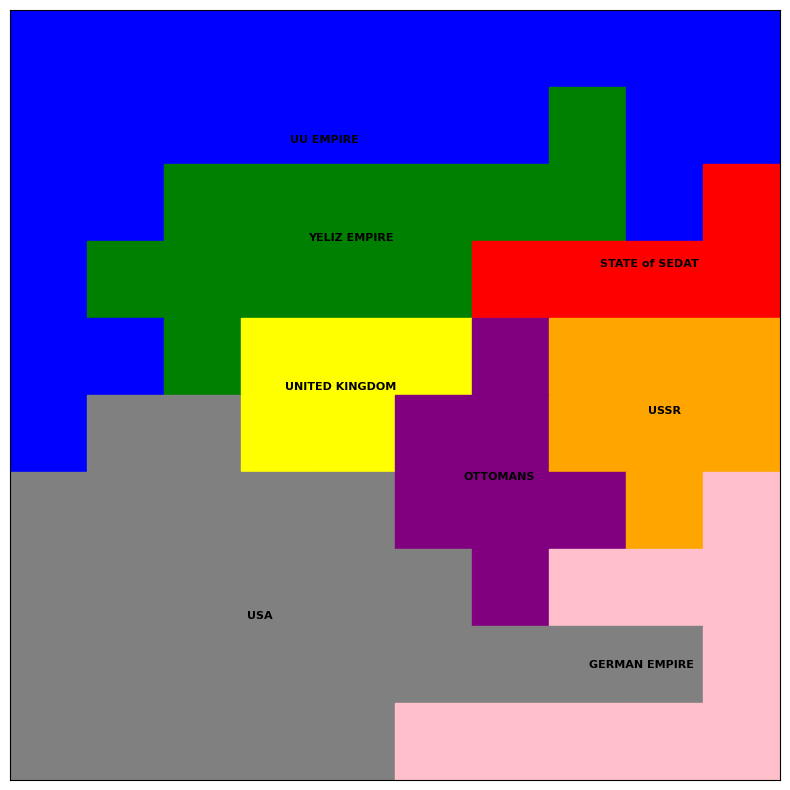


Turn 31
Country 1 attacks Country 5
Country 7 attacks Country 4
Country 5 attacks Country 4
Country 6 attacks Country 4
Country 3 attacks Country 5
Country 4 attacks Country 6
Country 0 attacks Country 1
Country 2 attacks Country 0


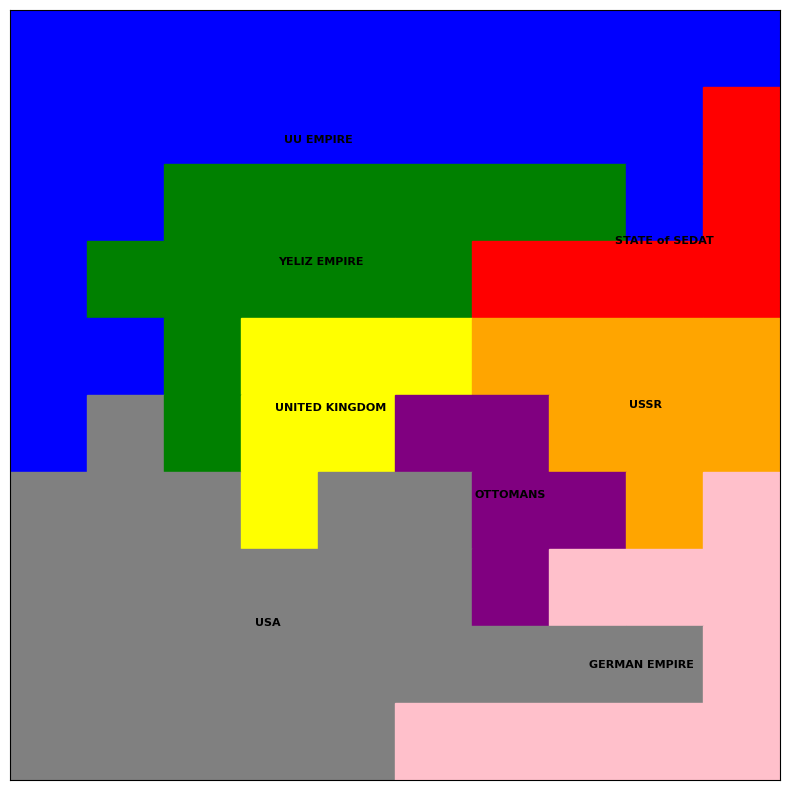


Turn 32
Country 2 attacks Country 7
Country 1 attacks Country 5
Country 5 attacks Country 0
Country 7 attacks Country 6
Country 4 attacks Country 3
Country 3 attacks Country 5
Country 0 attacks Country 5
Country 6 attacks Country 5


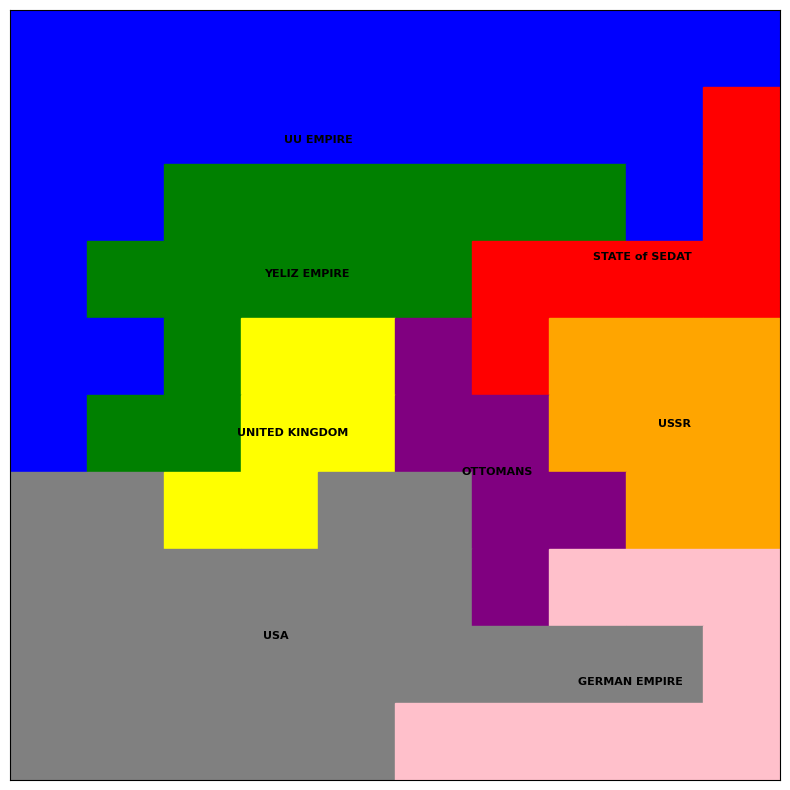


Turn 33
Country 1 attacks Country 5
Country 4 attacks Country 6
Country 3 attacks Country 4
Country 6 attacks Country 5
Country 7 attacks Country 4
Country 2 attacks Country 7
Country 0 attacks Country 2
Country 5 attacks Country 1


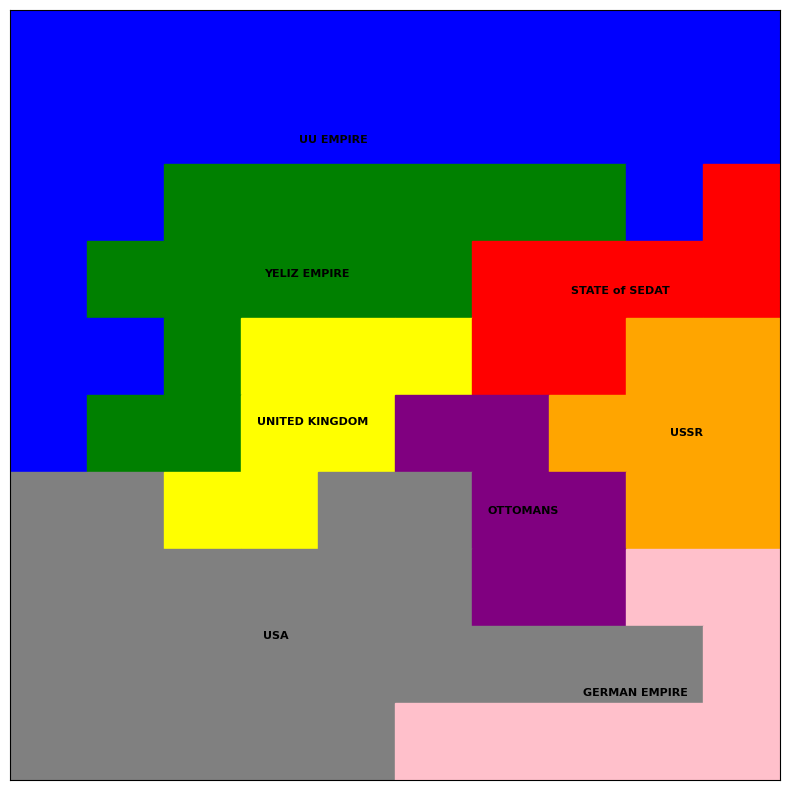


Turn 34
Country 4 attacks Country 5
Country 5 attacks Country 4
Country 6 attacks Country 7
Country 2 attacks Country 1
Country 0 attacks Country 5
Country 1 attacks Country 0
Country 7 attacks Country 2
Country 3 attacks Country 4


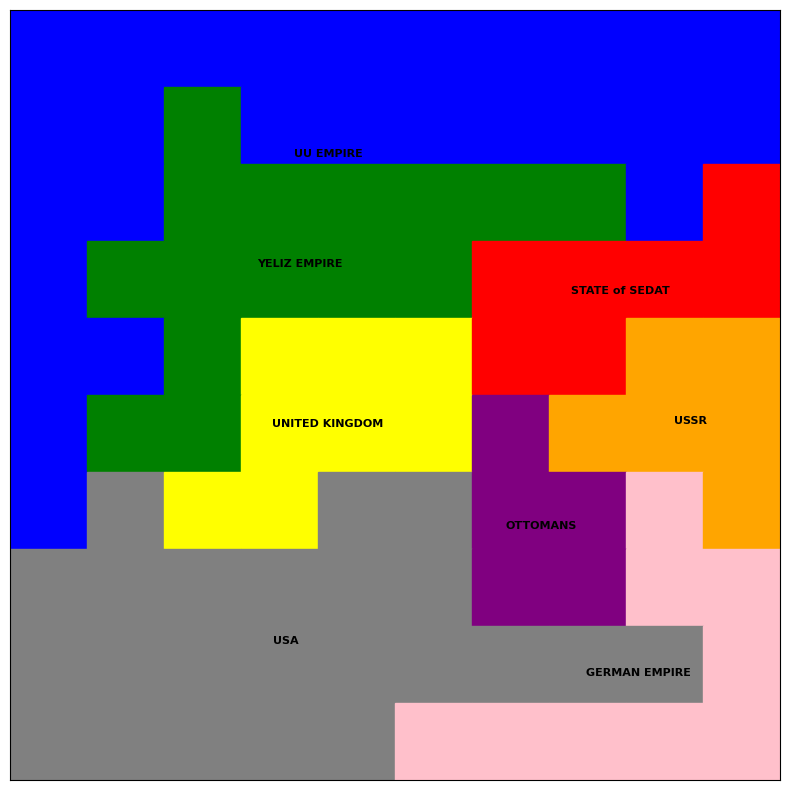


Turn 35
Country 7 attacks Country 2
Country 4 attacks Country 3
Country 6 attacks Country 4
Country 2 attacks Country 1
Country 3 attacks Country 1
Country 5 attacks Country 3
Country 0 attacks Country 1
Country 1 attacks Country 3


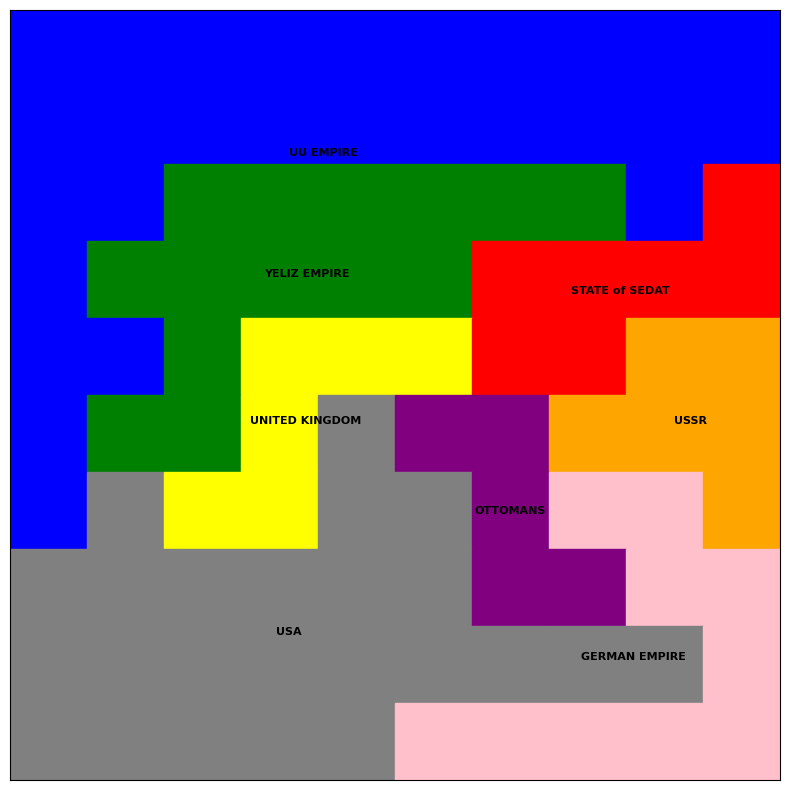


Turn 36
Country 4 attacks Country 3
Country 5 attacks Country 0
Country 3 attacks Country 5
Country 0 attacks Country 1
Country 1 attacks Country 5
Country 7 attacks Country 4
Country 6 attacks Country 4
Country 2 attacks Country 4


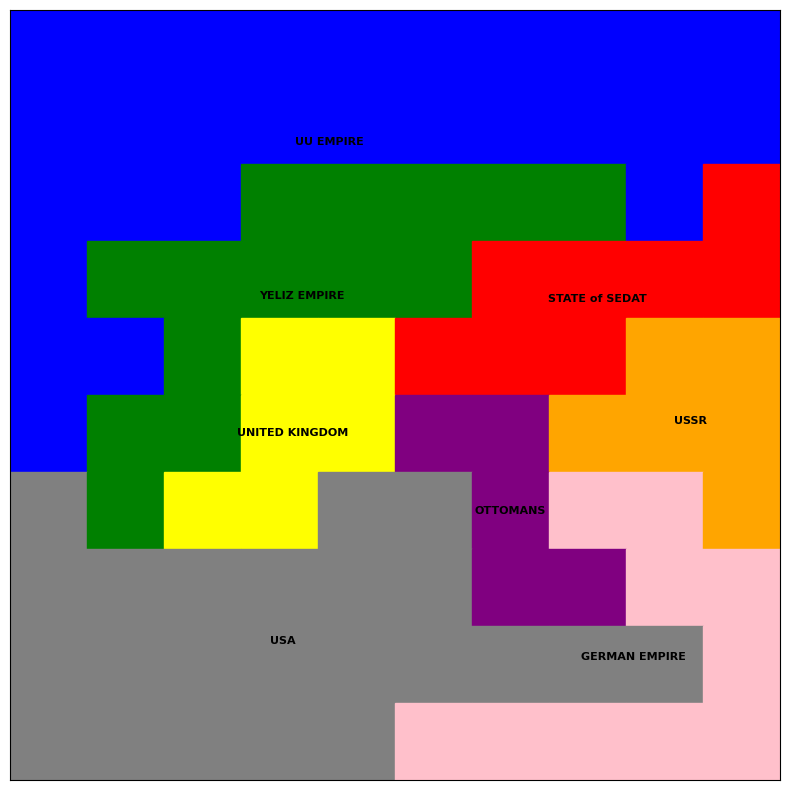


Turn 37
Country 7 attacks Country 4
Country 3 attacks Country 2
Country 5 attacks Country 1
Country 2 attacks Country 0
Country 1 attacks Country 2
Country 4 attacks Country 3
Country 0 attacks Country 5
Country 6 attacks Country 5


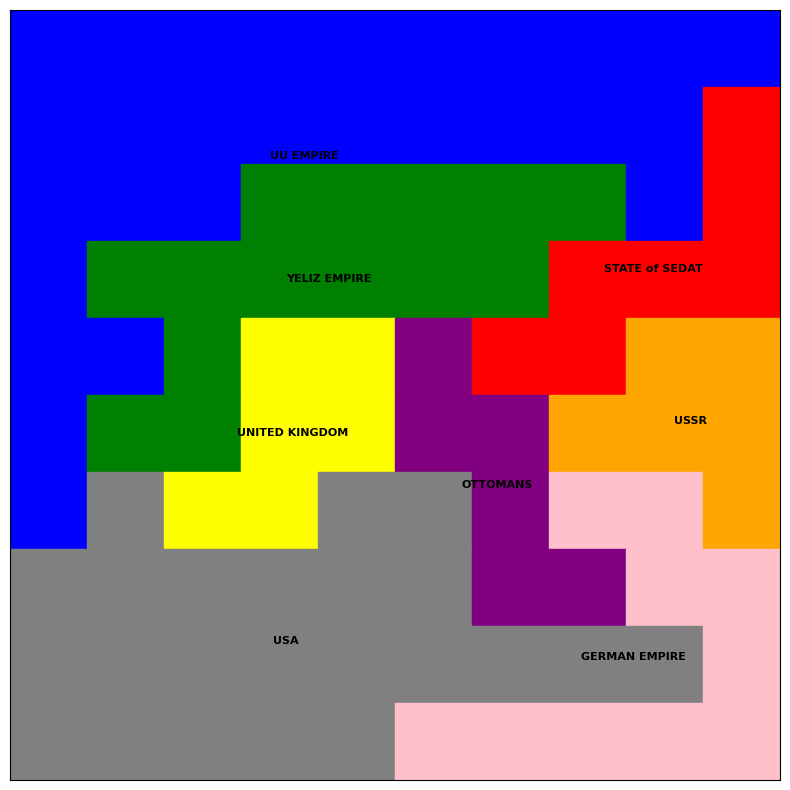


Turn 38
Country 5 attacks Country 0
Country 0 attacks Country 5
Country 1 attacks Country 4
Country 4 attacks Country 1
Country 6 attacks Country 5
Country 2 attacks Country 0
Country 7 attacks Country 4
Country 3 attacks Country 4


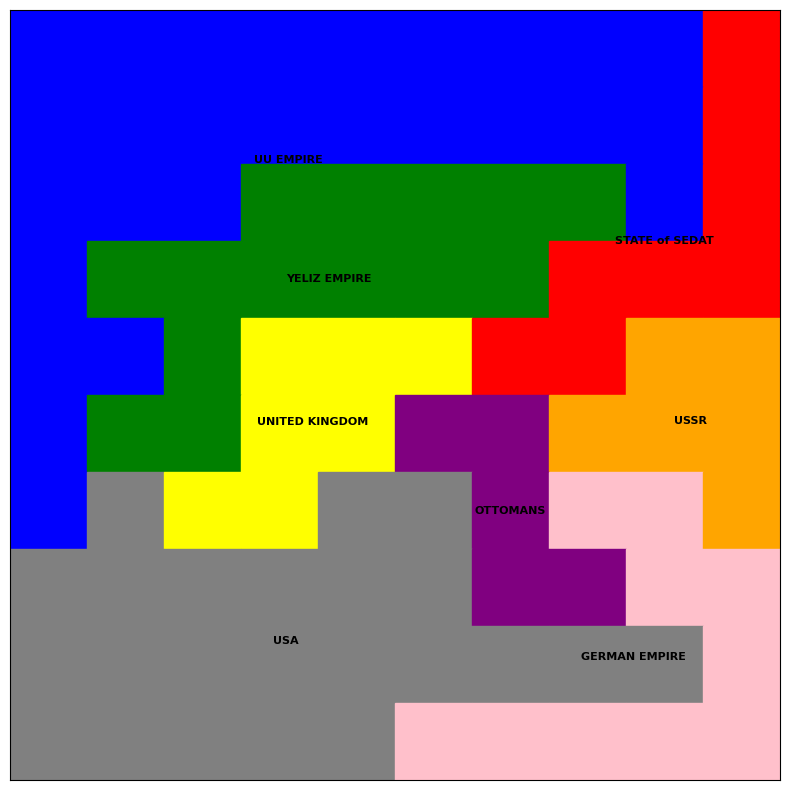


Turn 39
Country 6 attacks Country 7
Country 0 attacks Country 2
Country 5 attacks Country 3
Country 2 attacks Country 6
Country 4 attacks Country 2
Country 3 attacks Country 4
Country 7 attacks Country 2
Country 1 attacks Country 3


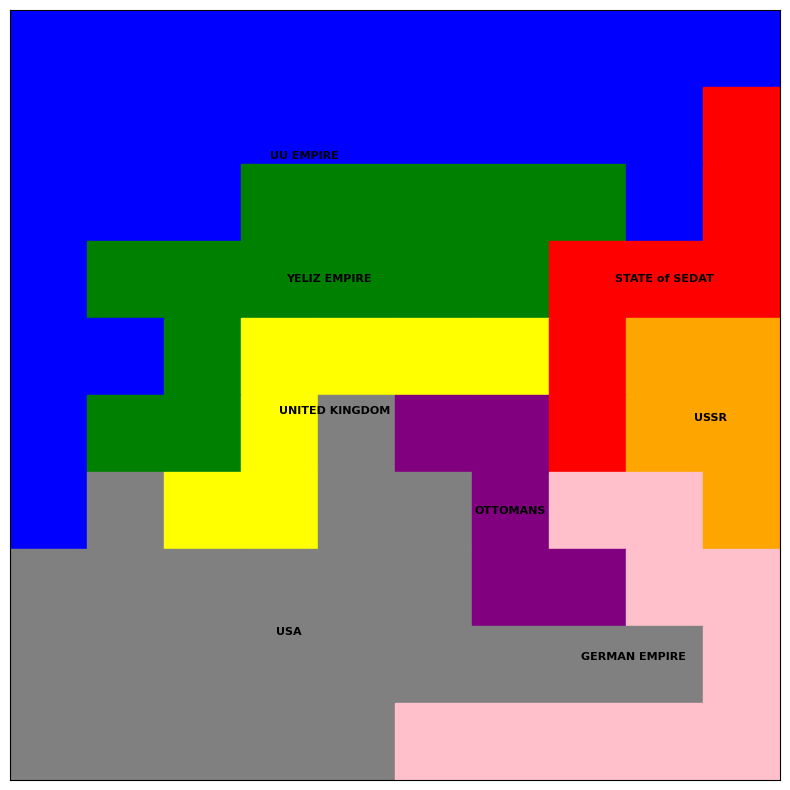


Turn 40
Country 3 attacks Country 2
Country 2 attacks Country 3
Country 7 attacks Country 6
Country 6 attacks Country 4
Country 0 attacks Country 1
Country 1 attacks Country 5
Country 4 attacks Country 5
Country 5 attacks Country 1


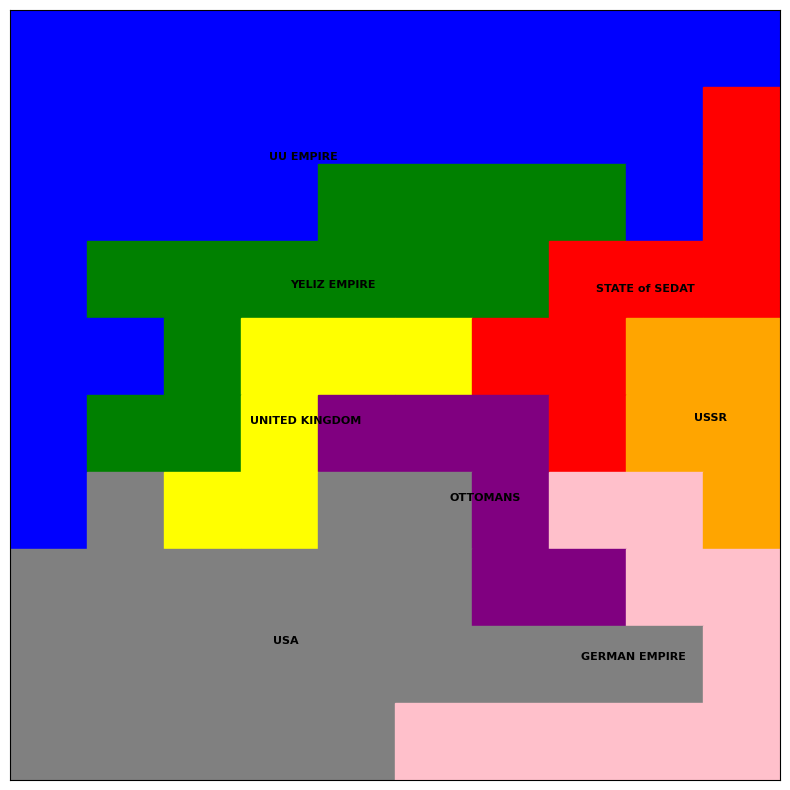


Turn 41
Country 2 attacks Country 4
Country 1 attacks Country 2
Country 6 attacks Country 7
Country 4 attacks Country 2
Country 5 attacks Country 4
Country 7 attacks Country 2
Country 0 attacks Country 5
Country 3 attacks Country 4


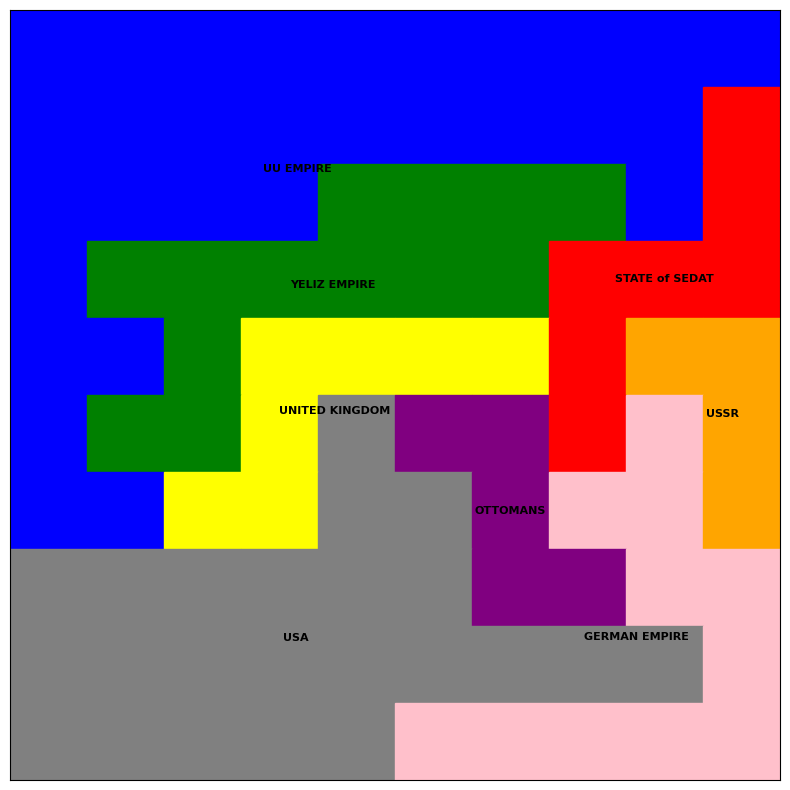


Turn 42
Country 3 attacks Country 5
Country 7 attacks Country 2
Country 1 attacks Country 3
Country 0 attacks Country 5
Country 6 attacks Country 5
Country 4 attacks Country 5
Country 5 attacks Country 3
Country 2 attacks Country 4


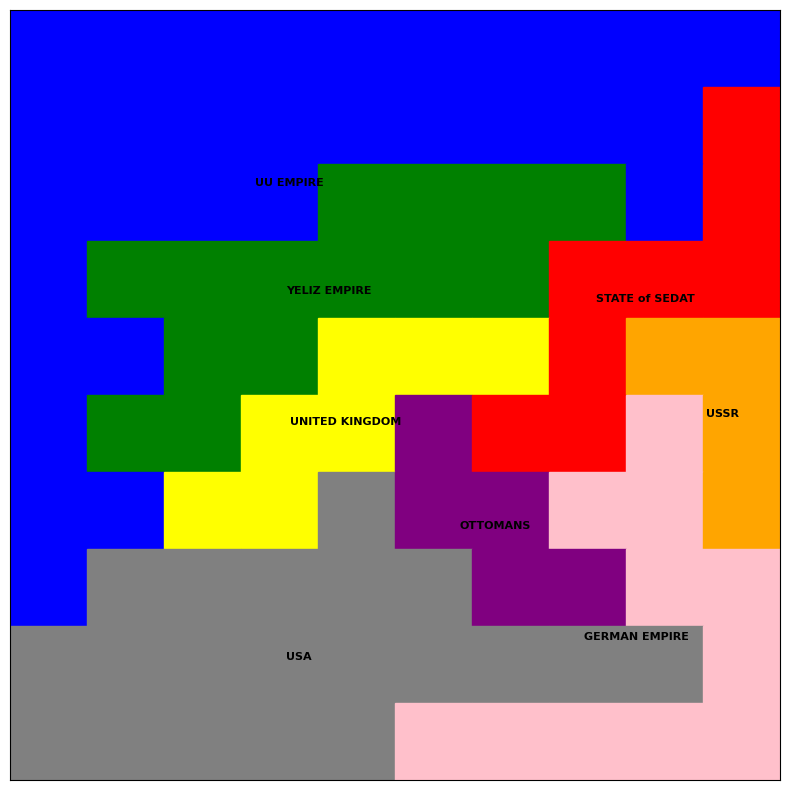


Turn 43
Country 1 attacks Country 3
Country 2 attacks Country 3
Country 3 attacks Country 1
Country 6 attacks Country 2
Country 5 attacks Country 6
Country 0 attacks Country 5
Country 7 attacks Country 6
Country 4 attacks Country 6


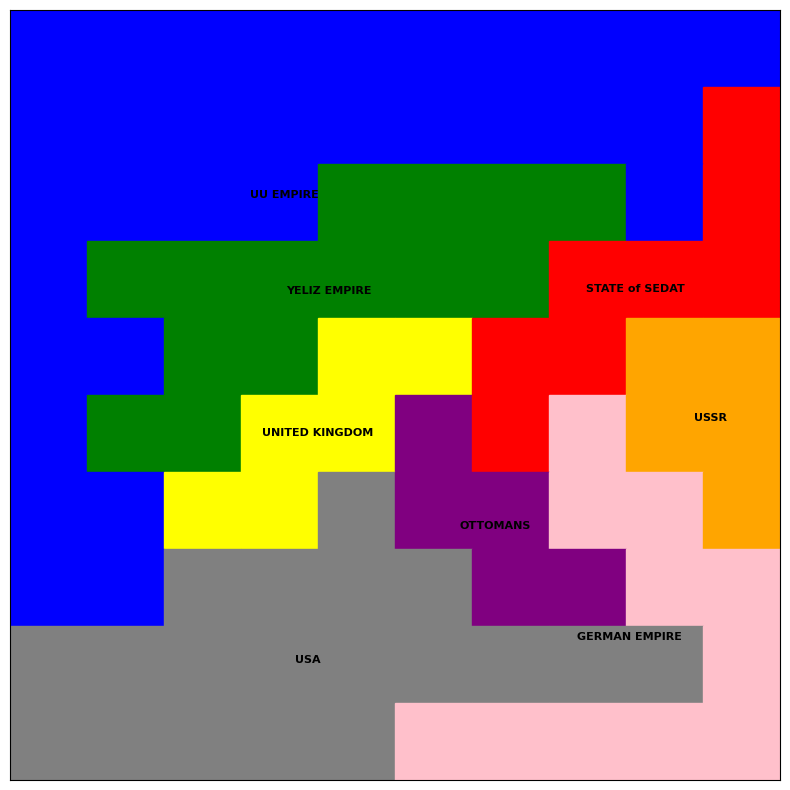


Turn 44
Country 1 attacks Country 0
Country 3 attacks Country 2
Country 5 attacks Country 3
Country 0 attacks Country 3
Country 6 attacks Country 2
Country 7 attacks Country 2
Country 2 attacks Country 4
Country 4 attacks Country 2


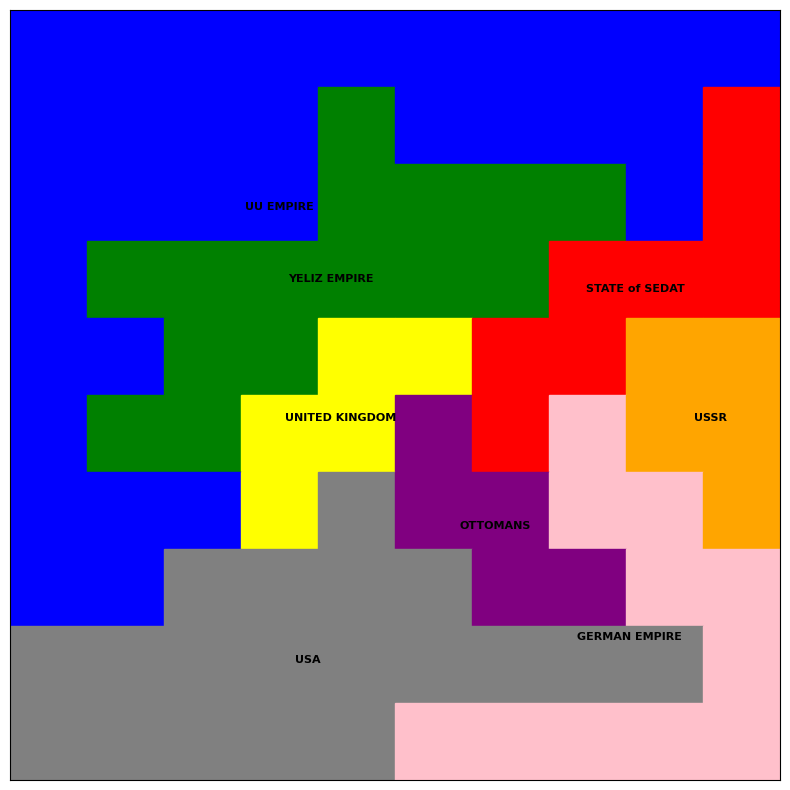


Turn 45
Country 7 attacks Country 6
Country 0 attacks Country 1
Country 6 attacks Country 4
Country 2 attacks Country 3
Country 5 attacks Country 0
Country 4 attacks Country 2
Country 1 attacks Country 2
Country 3 attacks Country 4


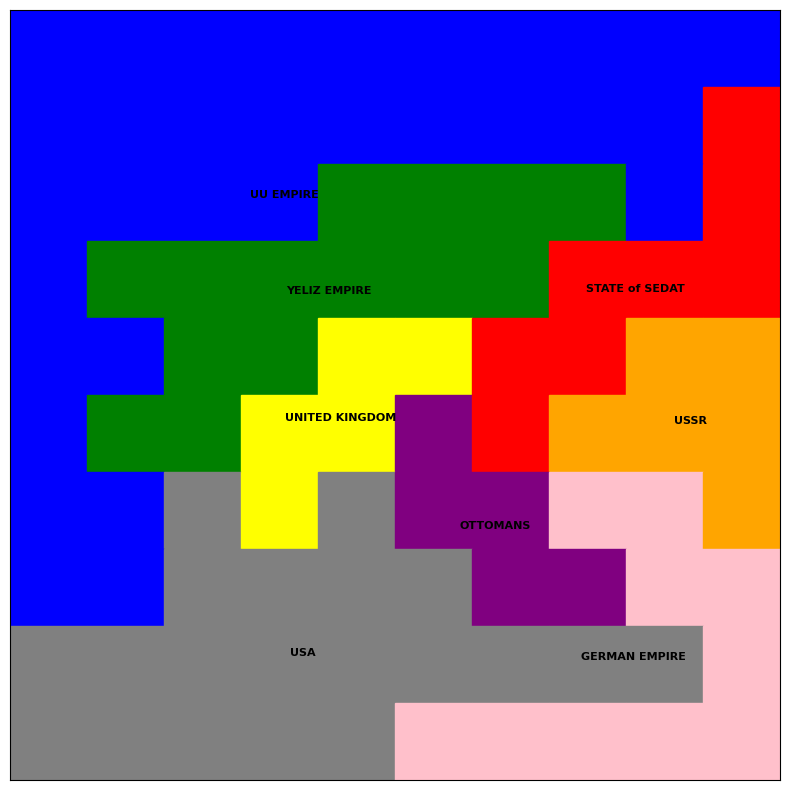


Turn 46
Country 7 attacks Country 2
Country 2 attacks Country 7
Country 5 attacks Country 1
Country 0 attacks Country 2
Country 3 attacks Country 5
Country 4 attacks Country 3
Country 1 attacks Country 0
Country 6 attacks Country 5


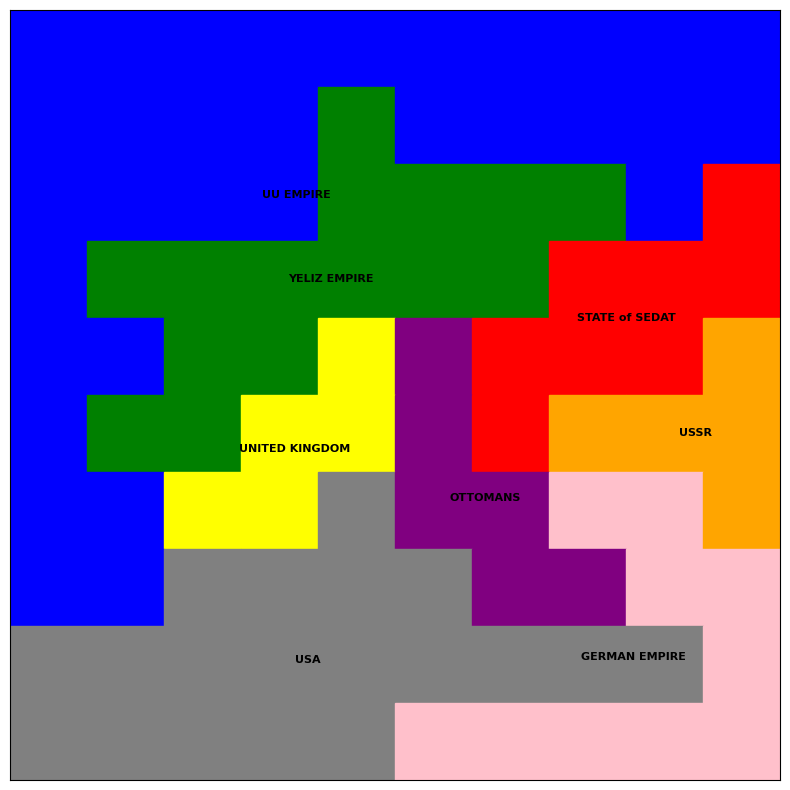


Turn 47
Country 6 attacks Country 5
Country 1 attacks Country 4
Country 5 attacks Country 4
Country 7 attacks Country 6
Country 0 attacks Country 2
Country 3 attacks Country 5
Country 2 attacks Country 4
Country 4 attacks Country 5


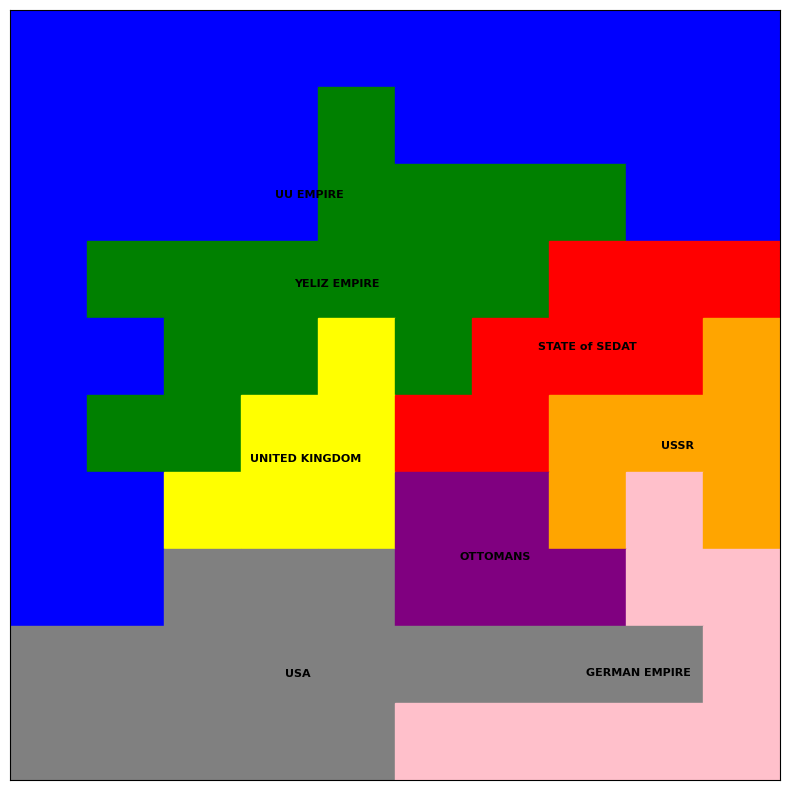


Turn 48
Country 0 attacks Country 1
Country 4 attacks Country 6
Country 7 attacks Country 6
Country 1 attacks Country 3
Country 6 attacks Country 5
Country 3 attacks Country 1
Country 2 attacks Country 0
Country 5 attacks Country 3


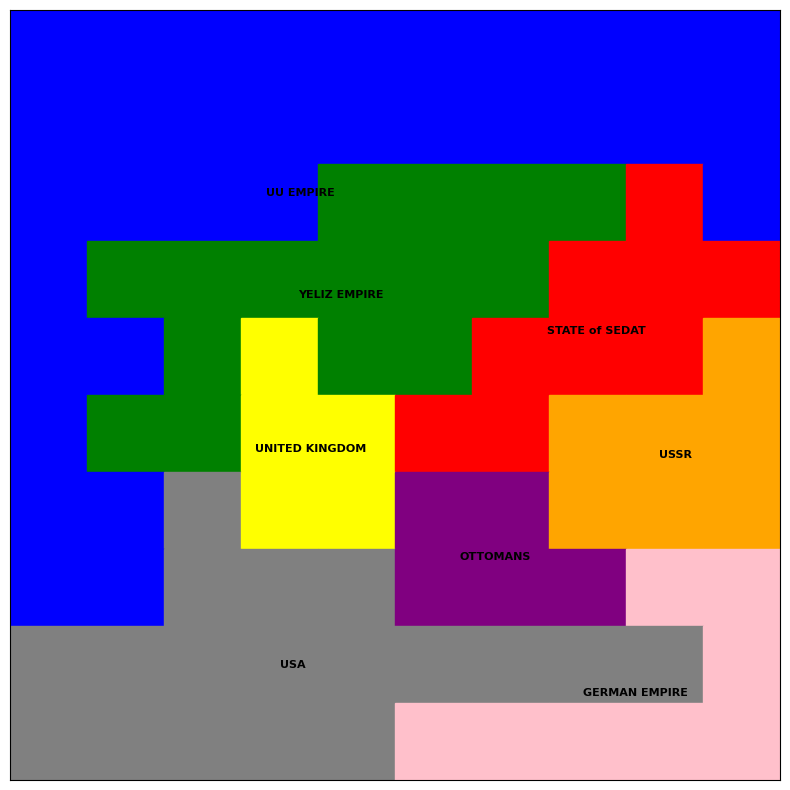


Turn 49
Country 6 attacks Country 7
Country 5 attacks Country 3
Country 7 attacks Country 6
Country 4 attacks Country 2
Country 3 attacks Country 4
Country 1 attacks Country 3
Country 2 attacks Country 1
Country 0 attacks Country 5


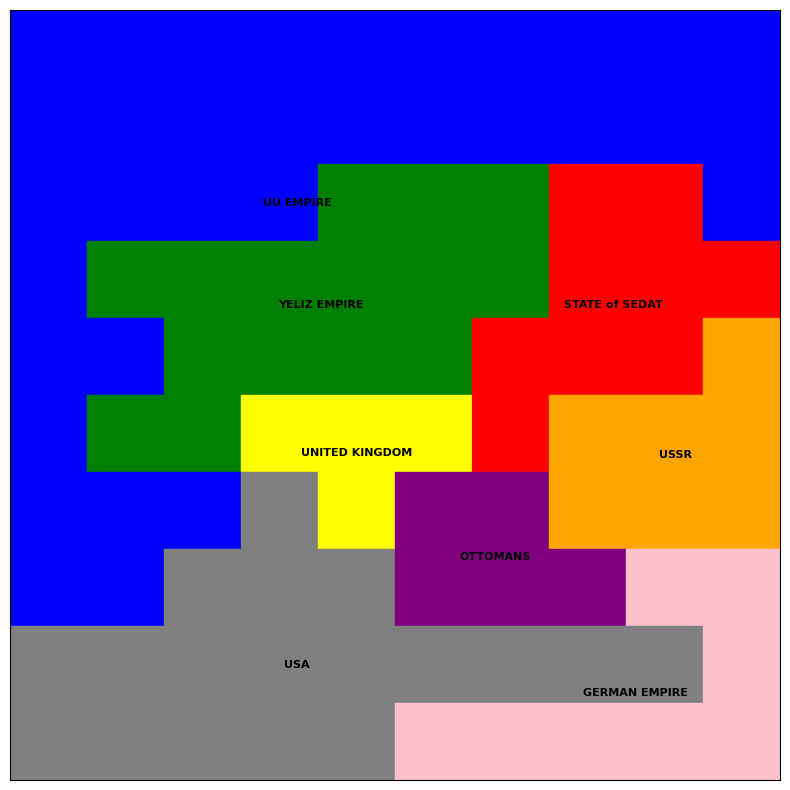


Turn 50
Country 5 attacks Country 4
Country 1 attacks Country 2
Country 3 attacks Country 1
Country 7 attacks Country 2
Country 2 attacks Country 3
Country 6 attacks Country 5
Country 0 attacks Country 1
Country 4 attacks Country 6


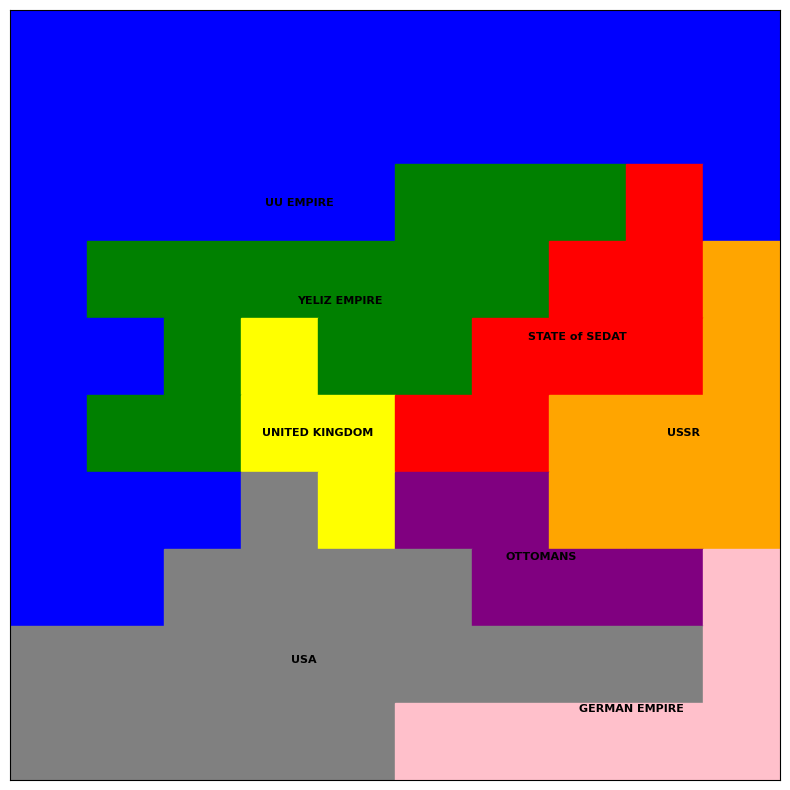

In [58]:
# Run the random_turn function 50 times
num_turns = 50

for turn in range(num_turns):
    print(f"\nTurn {turn + 1}")
    random_turn(map_data, stable_countries, countries)  # Simulate a random turn
    draw_map(map_data)  # Display the updated map
